## Resolução de problemas com regressão linear

Esse notebook contém 3 atividades em que coloquei em prática modelos de regressão linear para resolver os problemas propostos, considerando a analise exploratória dos dados, o ETL, a modelagem dos dados, a avaliação do modelo e o atendimento aos critérios dos mínimos quadrados aplicáveis à regressão linear simples e multivariada. 

In [ ]:
install.packages('gvlma')
library(ggplot2)
library(dplyr)
library(gvlma)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# 1) Problema 1

Para uma amostra de oito operadores de máquina, foram coletados o número de horas de treinamento (x) e o tempo necessário para completar o trabalho (y). Os dados coletados encontram-se na tabela abaixo:

In [ ]:
dados <- data.frame(x = c(5.2,	5.1,	4.9,	4.6,	4.7,	4.8,	4.6,	4.9) , y = c(13,	15,	16,	20,	19,	17,	21,	16))
dados

x,y
<dbl>,<dbl>
5.2,13
5.1,15
4.9,16
4.6,20
4.7,19
4.8,17
4.6,21
4.9,16


In [ ]:
str(dados)

'data.frame':	8 obs. of  2 variables:
 $ x: num  5.2 5.1 4.9 4.6 4.7 4.8 4.6 4.9
 $ y: num  13 15 16 20 19 17 21 16


## a)    Um gráfico de dispersão para os dados

> Bloco com recuo



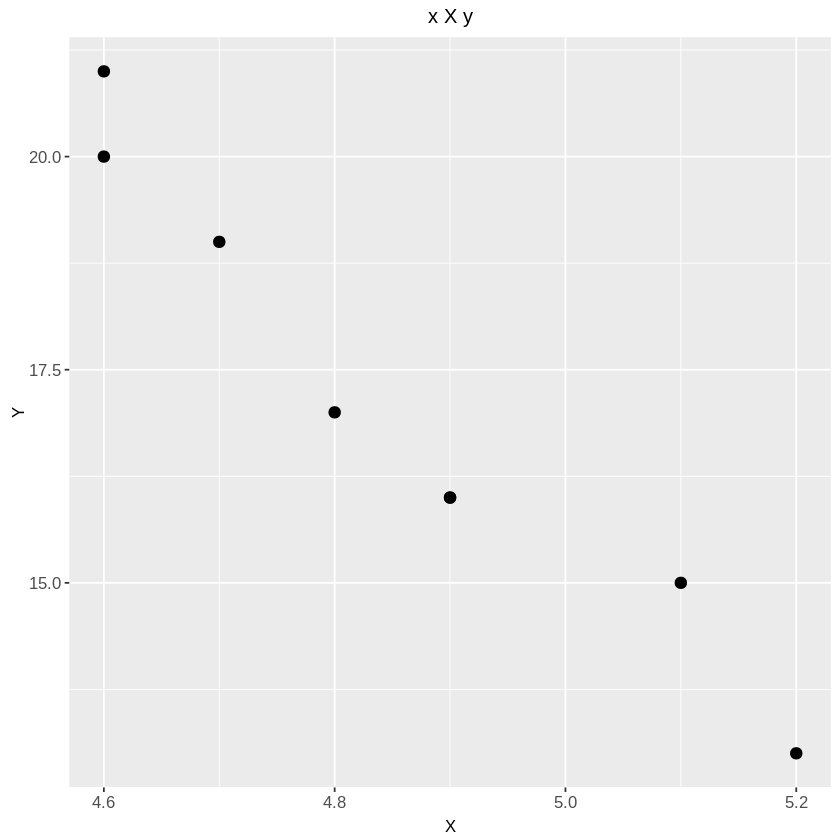

In [ ]:
ggplot(data = dados, aes(x = x, y = y)) + 
    geom_point(size = 1.5, stroke = 1.5) + 
    xlab("X") + 
    ylab("Y") + 
    ggtitle('x X y') +
    theme(
        plot.title=element_text(size = 12, hjust = 0.5),
        axis.title.y=element_text(size = 10, vjust = +0.2),
        axis.title.x=element_text(size = 10, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10),
    )

## b)    Determine o modelo de regressão linear simples entre as variáveis x e y, sendo y a variável resposta.

In [ ]:
linear <- lm(formula = y ~ x, data = dados)
linear


Call:
lm(formula = y ~ x, data = dados)

Coefficients:
(Intercept)            x  
      74.90       -11.91  


In [ ]:
summary(linear)


Call:
lm(formula = y ~ x, data = dados)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72059 -0.52941 -0.02941  0.27941  0.89706 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   74.897      5.514   13.58 9.88e-06 ***
x            -11.912      1.136  -10.49 4.42e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6624 on 6 degrees of freedom
Multiple R-squared:  0.9483,	Adjusted R-squared:  0.9396 
F-statistic:   110 on 1 and 6 DF,  p-value: 4.416e-05


o p value abaixo da significância de 5% indica que o h0 é diferente de zero

O beta1 (intercepto) possui o valor de 6,2132

O beta2 da variável explicativa possui o valor de -0.7960

## c)    Faça uma análise do modelo de regressão utilizando a função summary:
resíduos, significância estatística dos coeficientes, percentual de variância explicada pelo modelo.

In [ ]:
resumo <- summary(linear)
resumo


Call:
lm(formula = y ~ x, data = dados)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72059 -0.52941 -0.02941  0.27941  0.89706 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   74.897      5.514   13.58 9.88e-06 ***
x            -11.912      1.136  -10.49 4.42e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6624 on 6 degrees of freedom
Multiple R-squared:  0.9483,	Adjusted R-squared:  0.9396 
F-statistic:   110 on 1 and 6 DF,  p-value: 4.416e-05


In [ ]:
resumo$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),74.89706,5.514304,13.58232,9.884550e-06
x,-11.91176,1.135944,-10.48622,4.415513e-05


In [ ]:
dados$y_estimado <- linear$fitted.values
dados

x,y,y_estimado
<dbl>,<dbl>,<dbl>
5.2,13,12.95588
5.1,15,14.14706
4.9,16,16.52941
4.6,20,20.10294
4.7,19,18.91176
4.8,17,17.72059
4.6,21,20.10294
4.9,16,16.52941


In [ ]:
dados['residuos'] <- linear$residuals
dados

x,y,y_estimado,residuos
<dbl>,<dbl>,<dbl>,<dbl>
5.2,13,12.95588,0.04411765
5.1,15,14.14706,0.85294118
4.9,16,16.52941,-0.52941176
4.6,20,20.10294,-0.10294118
4.7,19,18.91176,0.08823529
4.8,17,17.72059,-0.72058824
4.6,21,20.10294,0.89705882
4.9,16,16.52941,-0.52941176


In [ ]:
coeficientes <- resumo$coefficients
coeficientes

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),74.89706,5.514304,13.58232,9.884550e-06
x,-11.91176,1.135944,-10.48622,4.415513e-05


testando

In [ ]:
coeficientes[1,1] + coeficientes[2,1] * dados[1,1]
coeficientes[1,1] + coeficientes[2,1] * dados[2,1]

[1] 12.95588

[1] 14.14706

O beta 1 (intercepto) tem o valor de R$ 74.897 e o beta2 -11.911

O valor 4.4155 nos indica que ao testarmos a hipotese de beta2 =0 a hipotese é rejeitada, então beta2 != 0, condição para a validade do modelo linear

### Validade do uso do modelo linear por mínimos quadrados



Correlação:

In [ ]:
cor(dados[c('x','y')])

,x,y
x,1.0000000,-0.9737856
y,-0.9737856,1.0000000


Média dos resíduos próxima a 0:

In [ ]:
mean(dados$residuos)

[1] 6.071532e-18

Heteroedasticidade

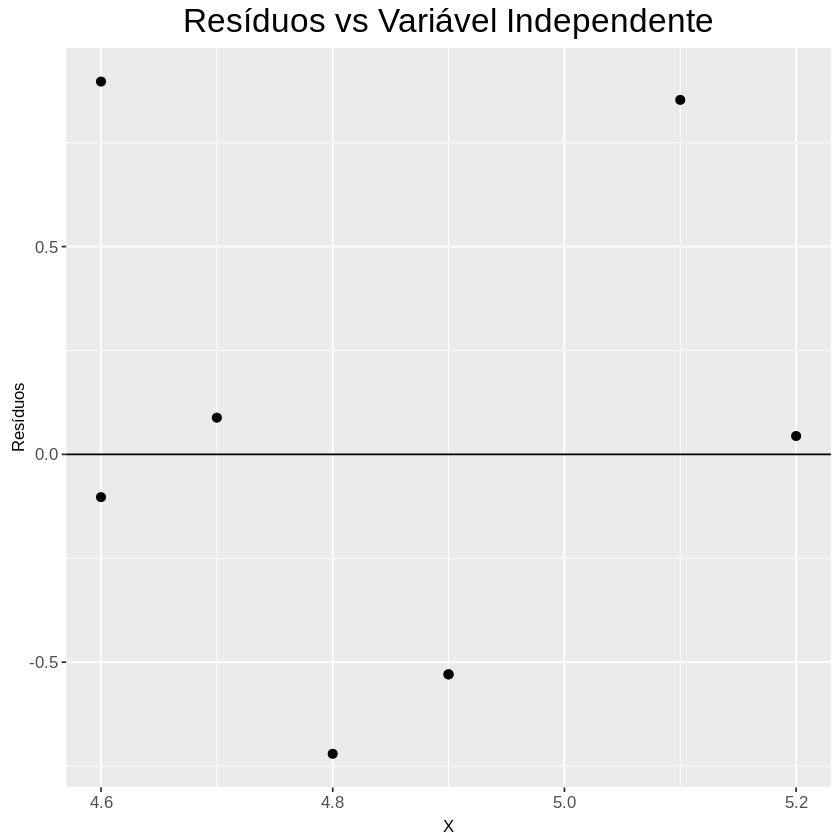

In [ ]:
ggplot(data = dados, aes(x = x, y = residuos)) + 
    geom_hline(yintercept = 0, color = 'black') +
    geom_point(size = 1.5, stroke = 1) + 
    xlab("X") + 
    ylab("Resíduos") + 
    ggtitle('Resíduos vs Variável Independente') +
    theme(
        plot.title=element_text(size = 20, hjust = 0.5),
        axis.title.y=element_text(size = 10, vjust = +0.2),
        axis.title.x=element_text(size = 10, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10),
    )

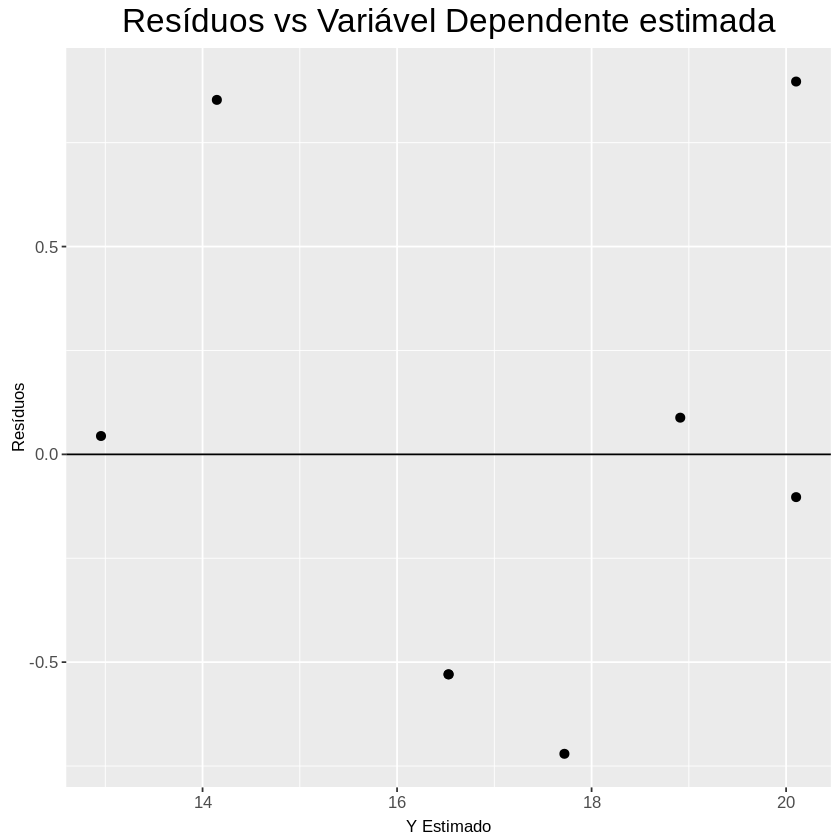

In [ ]:
ggplot(data = dados, aes(x = y_estimado, y = residuos)) + 
    geom_hline(yintercept = 0, color = 'black') +
    geom_point(size = 1.5, stroke = 1) + 
    xlab("Y Estimado") + 
    ylab("Resíduos") + 
    ggtitle('Resíduos vs Variável Dependente estimada') +
    theme(
        plot.title=element_text(size = 20, hjust = 0.5),
        axis.title.y=element_text(size = 10, vjust = +0.2),
        axis.title.x=element_text(size = 10, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10),
    )

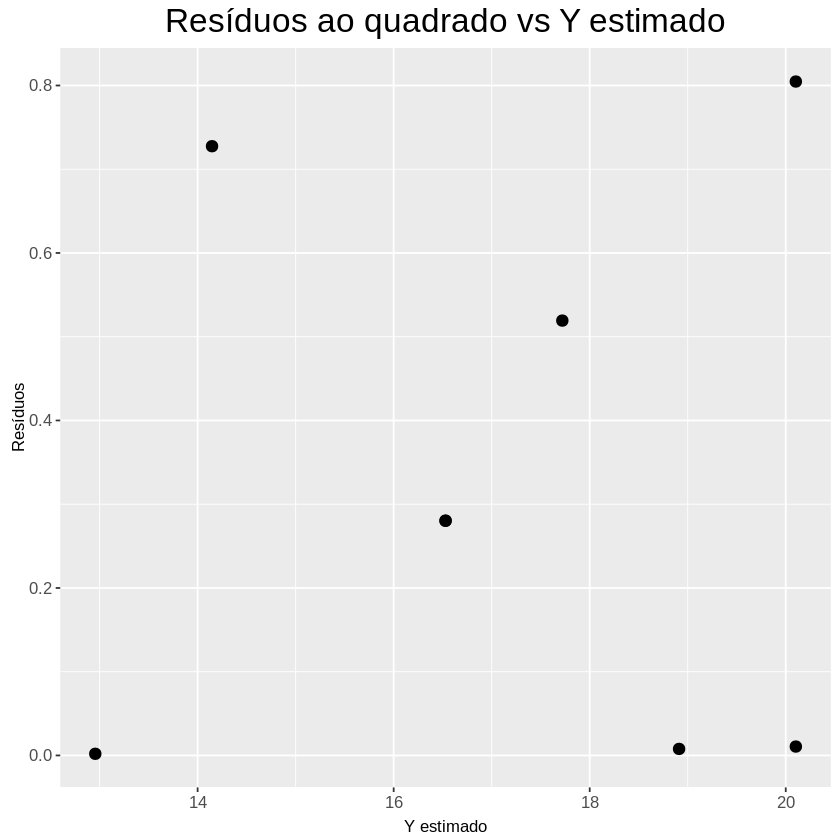

In [ ]:
ggplot(data = dados, aes(x = y_estimado, y = residuos ** 2)) + 
    geom_point(size = 1.5, stroke = 1.5) + 
    xlab("Y estimado") + 
    ylab("Resíduos") + 
    ggtitle('Resíduos ao quadrado vs Y estimado') +
    theme(
        plot.title=element_text(size = 20, hjust = 0.5),
        axis.title.y=element_text(size = 10, vjust = +0.2),
        axis.title.x=element_text(size = 10, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10),
    )

In [ ]:
summary(gvlma(linear))


Call:
lm(formula = y ~ x, data = dados)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72059 -0.52941 -0.02941  0.27941  0.89706 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   74.897      5.514   13.58 9.88e-06 ***
x            -11.912      1.136  -10.49 4.42e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6624 on 6 degrees of freedom
Multiple R-squared:  0.9483,	Adjusted R-squared:  0.9396 
F-statistic:   110 on 1 and 6 DF,  p-value: 4.416e-05


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = linear) 

                    Value p-value                Decision
Global Stat        4.0264 0.40244 Assumptions acceptable.
Skewness           0.2634 0.60778 Assumptions acceptable.
Kurtosis           0.4396 0.50729 Assumptions acceptable.
Link Function      3.0679 0.07985 Assumptions acceptable.
Hete

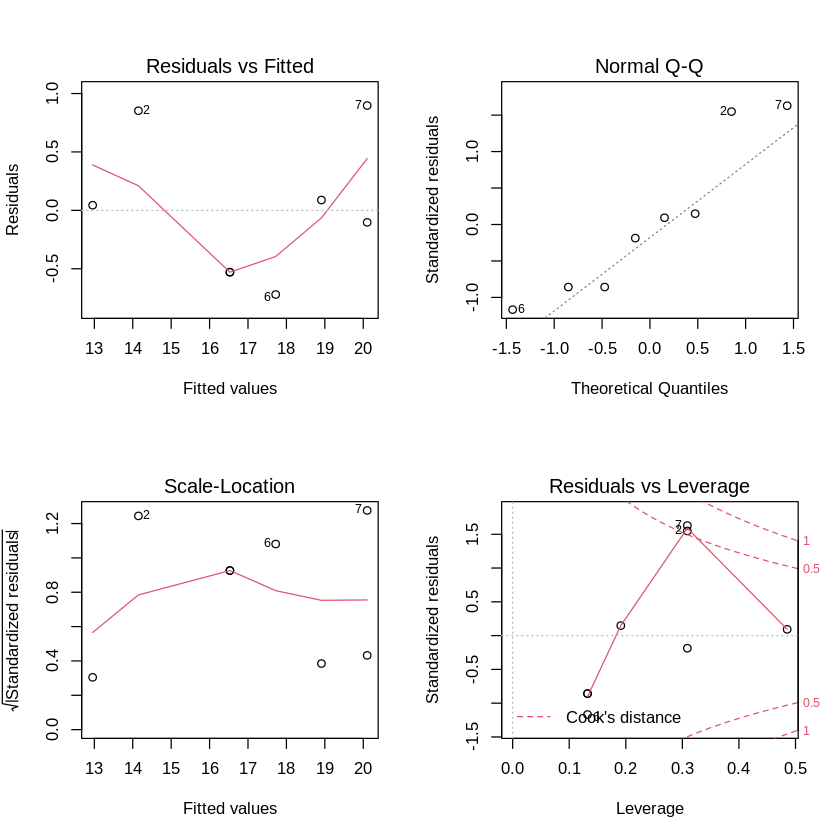

In [ ]:
par(mfrow=c(2,2))
plot(linear)

### Resíduos e R quadrado

In [ ]:
erro_quadrado <- sum(apply(dados, 1, function(x) x['residuos'] ** 2))
erro_quadrado

[1] 2.632353

In [ ]:
quadrados_totais <- sum(apply(dados, 1, function(x) (x['y'] - mean(dados$y_estimado)) ** 2 ))
quadrados_totais

[1] 50.875

In [ ]:
quadrados_regressao <- sum(apply(dados, 1, function(x) (x['y_estimado'] - mean(dados$y)) **2))
quadrados_regressao

[1] 48.24265

In [ ]:
r_2 <- quadrados_regressao / quadrados_totais
r_2

[1] 0.9482584

In [ ]:
resumo$r.squared

[1] 0.9482584

O r quadrado (coeficiente de determinação) nos dá uma idéia de quão bem podemos predizer a variável resposta a partir das variáveis preditoras, quanto mais próxima de 1 melhor o modelo explica a variabilidade dos dados de resposta ao redor de sua média.

In [ ]:
erro_quadratico_medio <- erro_quadrado / (nrow(dados) - 2)
erro_quadratico_medio

[1] 0.4387255

In [ ]:
anova(linear)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,48.242647,48.2426471,109.9609,4.415513e-05
Residuals,6,2.632353,0.4387255,NA,NA


O valor 4.4155 nos indica que ao testarmos a hipotese de beta2 =0 a hipotese é rejeitada, então beta2 != 0, condição para a validade do modelo linear

In [ ]:
resumo


Call:
lm(formula = y ~ x, data = dados)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72059 -0.52941 -0.02941  0.27941  0.89706 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   74.897      5.514   13.58 9.88e-06 ***
x            -11.912      1.136  -10.49 4.42e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6624 on 6 degrees of freedom
Multiple R-squared:  0.9483,	Adjusted R-squared:  0.9396 
F-statistic:   110 on 1 and 6 DF,  p-value: 4.416e-05


## d)    Trace, no gráfico anterior, a reta de regressão.

`geom_smooth()` using formula 'y ~ x'



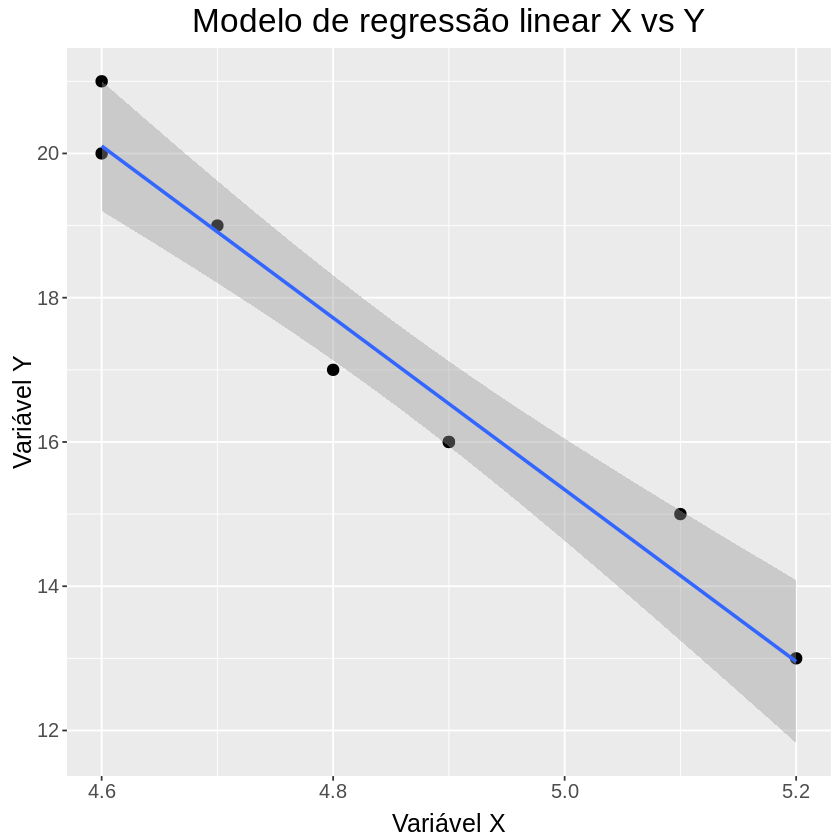

In [ ]:
ggplot(data = dados, aes(x = x, y = y)) + 
    geom_point(size = 1.5, stroke = 1.5) + 
    geom_smooth(method = lm) +
    xlab("Variável X") + 
    ylab("Variável Y") + 
    ggtitle('Modelo de regressão linear X vs Y') +
    theme(
        plot.title=element_text(size = 20, hjust = 0.5),
        axis.title.y=element_text(size = 15, vjust = +0.2),
        axis.title.x=element_text(size = 15, vjust = -0.2),
        axis.text.y=element_text(size = 12),
        axis.text.x=element_text(size = 12),
    )

# Problema 2
O site Gapminder compilou uma base com dados sobre população, expectativa de vida e PIB per capta de 142 países, em 12 anos diferentes.
Com estes dados, disponibilizados no arquivo pib_gapminder.csv, faça:


## a)    Faça a importação dos dados, verifique a estrutura e faça um sumário estatístico.

In [ ]:
df <- read.csv("/content/pib_gapminder.csv")

In [ ]:
head(df)

,pais,ano,pop,continente,expVida,pibPercap
,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>
1,Afghanistan,1952,8425333,Asia,28.801,779.4453
2,Afghanistan,1957,9240934,Asia,30.332,820.8530
3,Afghanistan,1962,10267083,Asia,31.997,853.1007
4,Afghanistan,1967,11537966,Asia,34.020,836.1971
5,Afghanistan,1972,13079460,Asia,36.088,739.9811
6,Afghanistan,1977,14880372,Asia,38.438,786.1134


In [ ]:
tail(df)

,pais,ano,pop,continente,expVida,pibPercap
,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>
1699,Zimbabwe,1982,7636524,Africa,60.363,788.8550
1700,Zimbabwe,1987,9216418,Africa,62.351,706.1573
1701,Zimbabwe,1992,10704340,Africa,60.377,693.4208
1702,Zimbabwe,1997,11404948,Africa,46.809,792.4500
1703,Zimbabwe,2002,11926563,Africa,39.989,672.0386
1704,Zimbabwe,2007,12311143,Africa,43.487,469.7093


In [ ]:
str(df)

'data.frame':	1704 obs. of  6 variables:
 $ pais      : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ ano       : int  1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ pop       : num  8425333 9240934 10267083 11537966 13079460 ...
 $ continente: chr  "Asia" "Asia" "Asia" "Asia" ...
 $ expVida   : num  28.8 30.3 32 34 36.1 ...
 $ pibPercap : num  779 821 853 836 740 ...


## d)    Faça um sumário estatístico dos dados

In [ ]:
summary(df)

     pais                ano            pop             continente       
 Length:1704        Min.   :1952   Min.   :6.001e+04   Length:1704       
 Class :character   1st Qu.:1966   1st Qu.:2.794e+06   Class :character  
 Mode  :character   Median :1980   Median :7.024e+06   Mode  :character  
                    Mean   :1980   Mean   :2.960e+07                     
                    3rd Qu.:1993   3rd Qu.:1.959e+07                     
                    Max.   :2007   Max.   :1.319e+09                     
    expVida        pibPercap       
 Min.   :23.60   Min.   :   241.2  
 1st Qu.:48.20   1st Qu.:  1202.1  
 Median :60.71   Median :  3531.8  
 Mean   :59.47   Mean   :  7215.3  
 3rd Qu.:70.85   3rd Qu.:  9325.5  
 Max.   :82.60   Max.   :113523.1  

##e)    Faça uma tabela de frequência absoluta e uma tabela de frequência relativa para verificar o número de observações por continente.

In [ ]:
nrow(df)

[1] 1704

In [ ]:
f_absoluta <- c()
f_relativa <- c()
continente <- c(unique(df$continente))
for(n in continente){
  f_absoluta <- append(f_absoluta, sum(df$continente == n))
  f_relativa <- append(f_relativa, round(sum(df$continente == n) / nrow(df), 3))
}

In [ ]:
frequencia_absoluta <- data.frame(cbind(continente, f_absoluta, f_relativa))
frequencia_absoluta$f_absoluta <- as.numeric(frequencia_absoluta$f_absoluta)
frequencia_absoluta$f_relativa  <- as.numeric(frequencia_absoluta$f_relativa )
frequencia_absoluta

continente,f_absoluta,f_relativa
<chr>,<dbl>,<dbl>
Asia,396,0.232
Europe,360,0.211
Africa,624,0.366
Americas,300,0.176
Oceania,24,0.014


## f)     Faça um gráfico de barras da tabela de frequência absoluta dos continentes.

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'frequencia' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. pas

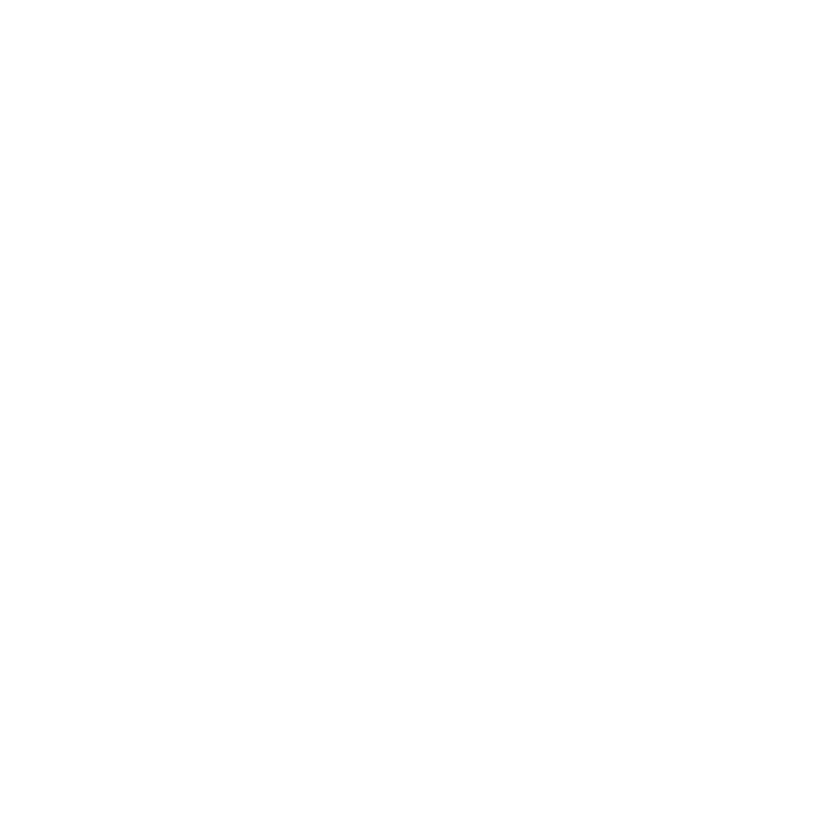

In [ ]:
  frequencia_absoluta %>% ggplot(aes(x = continente, y = frequencia)) +
  geom_col() +
  geom_text(aes(label = frequencia), 
          vjust = -1) +
  labs(title = "Contagem dos diamantes de cada cor", x="Cor", y="Frequencia") +
  theme_classic()

## g)    Faça um gráfico apropriado para relacionar o PIB per capta à expectativa de vida.

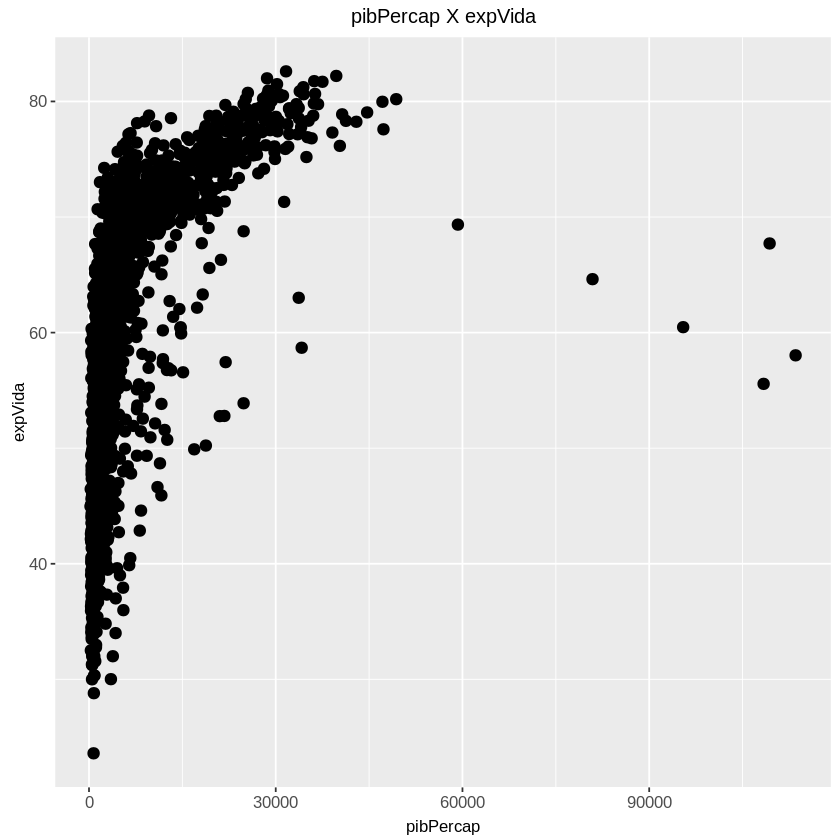

In [ ]:
ggplot(data = df, aes(x = pibPercap, y = expVida)) + 
    geom_point(size = 1.5, stroke = 1.5) + 
    xlab("pibPercap") + 
    ylab("expVida") + 
    ggtitle('pibPercap X expVida') +
    theme(
        plot.title=element_text(size = 12, hjust = 0.5),
        axis.title.y=element_text(size = 10, vjust = +0.2),
        axis.title.x=element_text(size = 10, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10),
    )

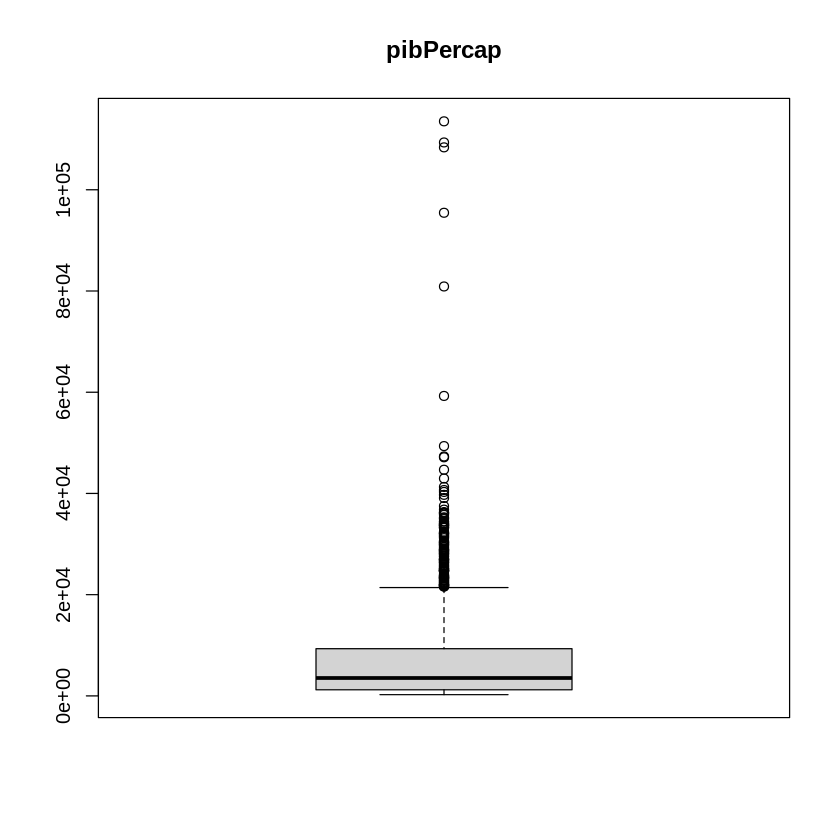

In [ ]:
boxplot(df$pibPercap, main= 'pibPercap')

`geom_smooth()` using formula 'y ~ x'



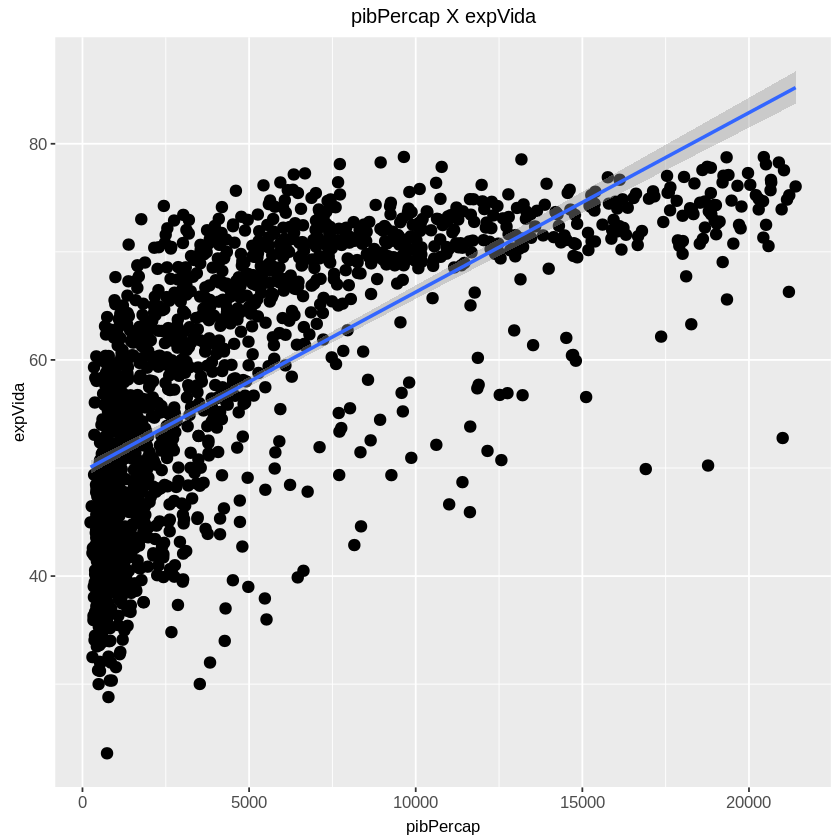

In [ ]:
dados <- df[df$pibPercap <= quantile(df$pibPercap,0.75) + 1.5 * (quantile(df$pibPercap,0.75) - quantile(df$pibPercap,0.25)) ,]
ggplot(data = dados, aes(x = pibPercap, y = expVida)) + 
    geom_point(size = 1.5, stroke = 1.5) + 
    geom_smooth(method = lm) +
    xlab("pibPercap") + 
    ylab("expVida") + 
    ggtitle('pibPercap X expVida') +
    theme(
        plot.title=element_text(size = 12, hjust = 0.5),
        axis.title.y=element_text(size = 10, vjust = +0.2),
        axis.title.x=element_text(size = 10, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10),
    )

In [ ]:
summary(dados$pibPercap)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  241.2  1093.2  2982.7  4974.6  7225.1 21399.5 

## h)    Crie duas novas colunas nesta base de dados com o logaritmo de PIB per capta, e o logaritmo da expectativa de vida. Estas colunas devem ter os nomes: lpibPercap e lexpVida, respectivamente.

In [ ]:
df$lpibPercap <- log(df$pibPercap)
df$lexpVida <- log(df$expVida)
head(df)

,pais,ano,pop,continente,expVida,pibPercap,lpibPercap,lexpVida
,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,1952,8425333,Asia,28.801,779.4453,6.658583,3.360410
2,Afghanistan,1957,9240934,Asia,30.332,820.8530,6.710344,3.412203
3,Afghanistan,1962,10267083,Asia,31.997,853.1007,6.748878,3.465642
4,Afghanistan,1967,11537966,Asia,34.020,836.1971,6.728864,3.526949
5,Afghanistan,1972,13079460,Asia,36.088,739.9811,6.606625,3.585960
6,Afghanistan,1977,14880372,Asia,38.438,786.1134,6.667101,3.649047


## i)      Faça um gráfico apropriado para relacionar estas duas novas variáveis.

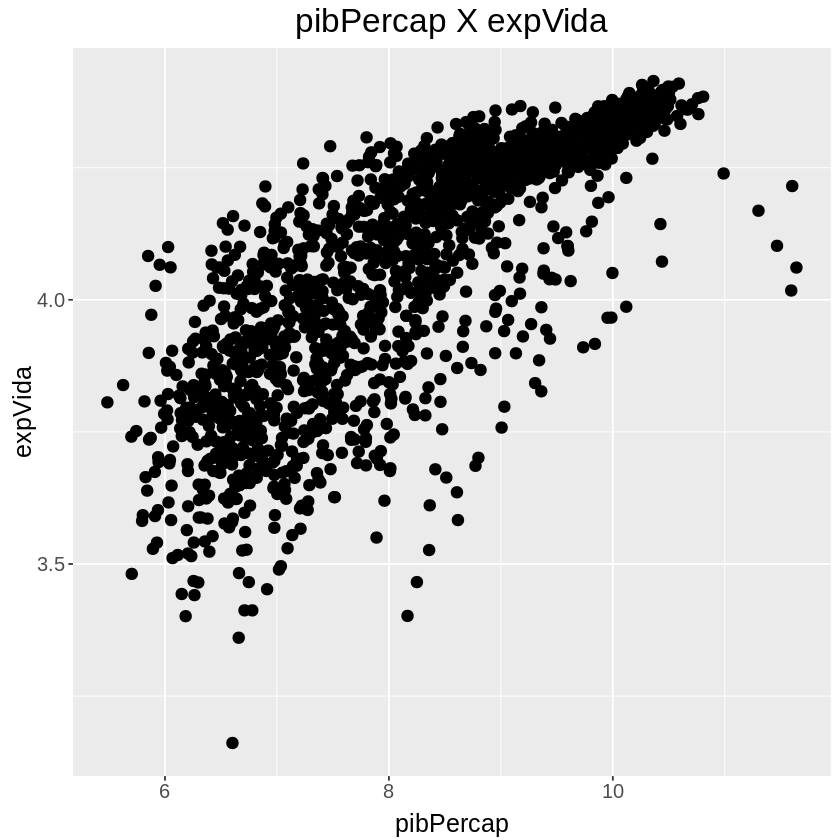

In [ ]:
ggplot(data = df, aes(x = lpibPercap, y = lexpVida)) + 
    geom_point(size = 1.5, stroke = 1.5) + 
    xlab("pibPercap") + 
    ylab("expVida") + 
    ggtitle('pibPercap X expVida') +
    theme(
        plot.title=element_text(size = 20, hjust = 0.5),
        axis.title.y=element_text(size = 15, vjust = +0.2),
        axis.title.x=element_text(size = 15, vjust = -0.2),
        axis.text.y=element_text(size = 12),
        axis.text.x=element_text(size = 12),
    )

## j)      Ajuste um modelo linear aos dados, utilizando as duas novas variáveis criadas, sendo lexpVida a variável resposta.

In [ ]:
regressao <- lm(formula = lexpVida ~ lpibPercap, data = df)
regressao


Call:
lm(formula = lexpVida ~ lpibPercap, data = df)

Coefficients:
(Intercept)   lpibPercap  
     2.8642       0.1465  


In [ ]:
resumo <- summary(regressao)
resumo


Call:
lm(formula = lexpVida ~ lpibPercap, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67059 -0.06453  0.01978  0.09086  0.36156 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.864177   0.023283  123.02   <2e-16 ***
lpibPercap  0.146549   0.002821   51.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1445 on 1702 degrees of freedom
Multiple R-squared:  0.6132,	Adjusted R-squared:  0.613 
F-statistic:  2698 on 1 and 1702 DF,  p-value: < 2.2e-16


In [ ]:
df$exp_estimada <- regressao$fitted.values
head(df, 5)

,pais,ano,pop,continente,expVida,pibPercap,lpibPercap,lexpVida,exp_estimada
,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,1952,8425333,Asia,28.801,779.4453,6.658583,3.360410,3.839985
2,Afghanistan,1957,9240934,Asia,30.332,820.8530,6.710344,3.412203,3.847571
3,Afghanistan,1962,10267083,Asia,31.997,853.1007,6.748878,3.465642,3.853218
4,Afghanistan,1967,11537966,Asia,34.020,836.1971,6.728864,3.526949,3.850285
5,Afghanistan,1972,13079460,Asia,36.088,739.9811,6.606625,3.585960,3.832371


In [ ]:
df$residuos <- regressao$residuals
head(df,5)

,pais,ano,pop,continente,expVida,pibPercap,lpibPercap,lexpVida,exp_estimada,residuos
,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,1952,8425333,Asia,28.801,779.4453,6.658583,3.360410,3.839985,-0.4795750
2,Afghanistan,1957,9240934,Asia,30.332,820.8530,6.710344,3.412203,3.847571,-0.4353675
3,Afghanistan,1962,10267083,Asia,31.997,853.1007,6.748878,3.465642,3.853218,-0.3875756
4,Afghanistan,1967,11537966,Asia,34.020,836.1971,6.728864,3.526949,3.850285,-0.3233363
5,Afghanistan,1972,13079460,Asia,36.088,739.9811,6.606625,3.585960,3.832371,-0.2464103


In [ ]:
coeficientes <- resumo$coefficients
coeficientes

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.864177,0.02328274,123.01718,0
lpibPercap,0.146549,0.00282126,51.94452,0


In [ ]:
# Testando a função linear
coeficientes[1,1] + coeficientes[2,1] * df[1,7]
coeficientes[1,1] + coeficientes[2,1] * df[2,7]

[1] 3.839985

[1] 3.847571

O beta 1 (intercepto) tem o valor de 2.864 e o beta2 0.1465
A função linear é: logexpectativa = 2.864 + 0.1465 * logPIB

O valor 0 Pr(>|t|) nos indica que ao testarmos a hipotese de beta2 =0 a hipotese é rejeitada, então beta2 != 0, condição para a validade do modelo linear

## Entendendo o porquê do log10

In [ ]:
teste <- lm( expVida ~ pibPercap, data = df)
summary(teste)


Call:
lm(formula = expVida ~ pibPercap, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.754  -7.758   2.176   8.225  18.426 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.396e+01  3.150e-01  171.29   <2e-16 ***
pibPercap   7.649e-04  2.579e-05   29.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.49 on 1702 degrees of freedom
Multiple R-squared:  0.3407,	Adjusted R-squared:  0.3403 
F-statistic: 879.6 on 1 and 1702 DF,  p-value: < 2.2e-16


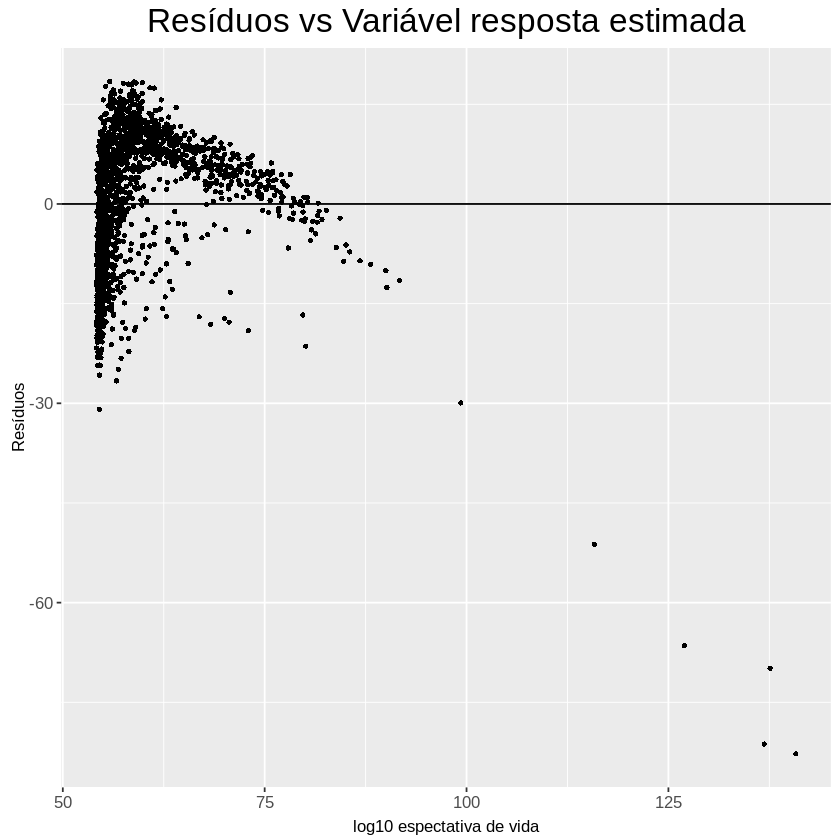

In [ ]:
ggplot(data = df, aes(x = teste$fitted.values, y = teste$residuals)) + 
    geom_hline(yintercept = 0, color = 'black') +
    geom_point(size = 1.5, stroke = 0) + 
    xlab("log10 espectativa de vida") + 
    ylab("Resíduos") + 
    ggtitle('Resíduos vs Variável resposta estimada') +
    theme(
        plot.title=element_text(size = 20, hjust = 0.5),
        axis.title.y=element_text(size = 10, vjust = +0.2),
        axis.title.x=element_text(size = 10, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10),
    )

In [ ]:
shapiro.test(df$lexpVida)


	Shapiro-Wilk normality test

data:  df$lexpVida
W = 0.93724, p-value < 2.2e-16


In [ ]:
shapiro.test(df$expVida)


	Shapiro-Wilk normality test

data:  df$expVida
W = 0.95248, p-value < 2.2e-16


In [ ]:
shapiro.test(df$lpibPercap)


	Shapiro-Wilk normality test

data:  df$lpibPercap
W = 0.9753, p-value < 2.2e-16


In [ ]:
shapiro.test(df$pibPercap)


	Shapiro-Wilk normality test

data:  df$pibPercap
W = 0.6522, p-value < 2.2e-16


Warning message:
“Use of `df$lpibPercap` is discouraged. Use `lpibPercap` instead.”
Warning message:
“Use of `df$lexpVida` is discouraged. Use `lexpVida` instead.”


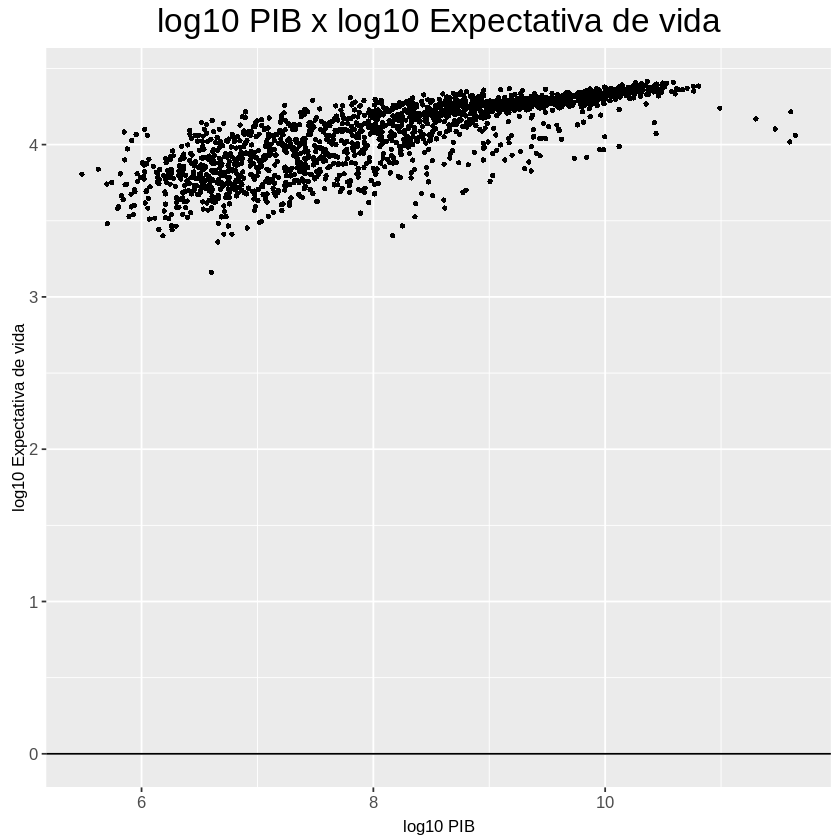

In [ ]:
ggplot(data = df, aes(x = df$lpibPercap, y = df$lexpVida)) + 
    geom_hline(yintercept = 0, color = 'black') +
    geom_point(size = 1.5, stroke = 0) + 
    xlab("log10 PIB") + 
    ylab("log10 Expectativa de vida") + 
    ggtitle('log10 PIB x log10 Expectativa de vida') +
    theme(
        plot.title=element_text(size = 20, hjust = 0.5),
        axis.title.y=element_text(size = 10, vjust = +0.2),
        axis.title.x=element_text(size = 10, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10),
    )

In [ ]:
cor(df$lexpVida, df$lpibPercap)

[1] 0.7830724

Apesar de não corrigir a normalidade, transformar os dados para log aumentou a linearidade e a correlação entre as duas variáveis

Warning message:
“Use of `df$pibPercap` is discouraged. Use `pibPercap` instead.”
Warning message:
“Use of `df$expVida` is discouraged. Use `expVida` instead.”


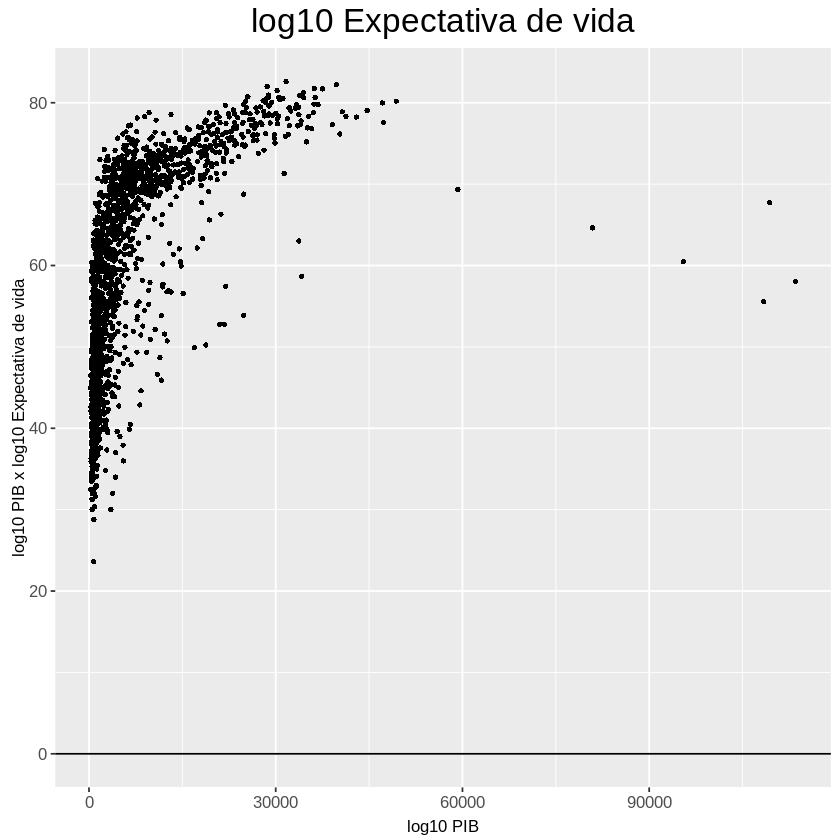

In [ ]:
ggplot(data = df, aes(x = df$pibPercap, y = df$expVida)) + 
    geom_hline(yintercept = 0, color = 'black') +
    geom_point(size = 1.5, stroke = 0) + 
    xlab("log10 PIB") + 
    ylab("log10 PIB x log10 Expectativa de vida") + 
    ggtitle('log10 Expectativa de vida') +
    theme(
        plot.title=element_text(size = 20, hjust = 0.5),
        axis.title.y=element_text(size = 10, vjust = +0.2),
        axis.title.x=element_text(size = 10, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10),
    )

In [ ]:
cor(df$expVida, df$pibPercap)

[1] 0.5837062


	Shapiro-Wilk normality test

data:  teste$residuals
W = 0.92018, p-value < 2.2e-16


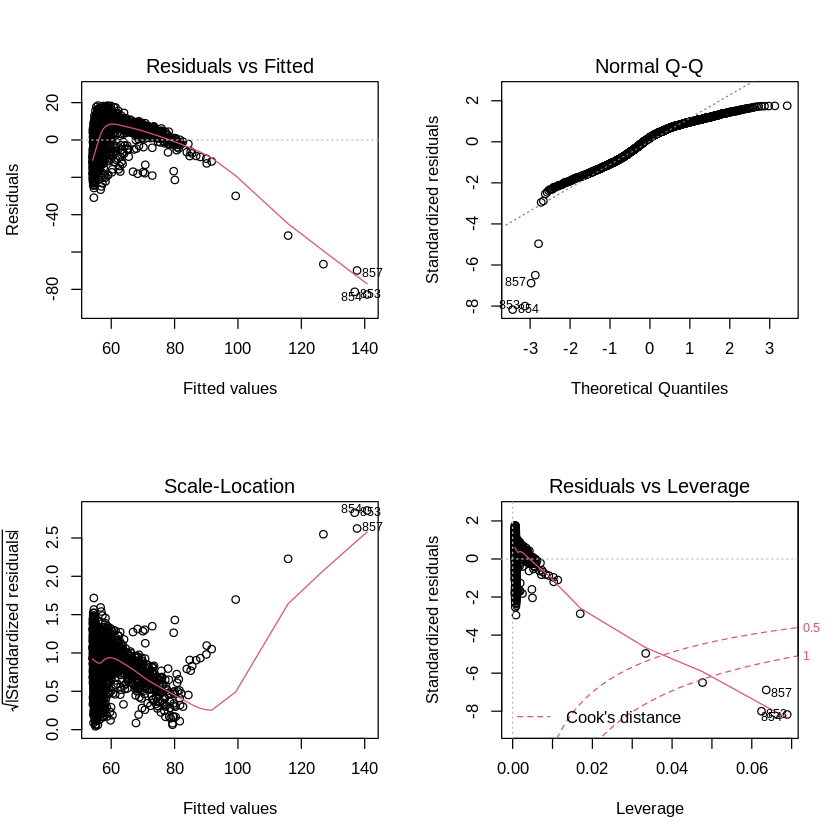

In [ ]:
par(mfrow=c(2,2))
plot(teste)
shapiro.test(teste$residuals)

In [ ]:
gvlma(teste)


Call:
lm(formula = expVida ~ pibPercap, data = df)

Coefficients:
(Intercept)    pibPercap  
  5.396e+01    7.649e-04  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = teste) 

                      Value p-value                   Decision
Global Stat        3063.127  0.0000 Assumptions NOT satisfied!
Skewness            442.980  0.0000 Assumptions NOT satisfied!
Kurtosis           2135.945  0.0000 Assumptions NOT satisfied!
Link Function       482.509  0.0000 Assumptions NOT satisfied!
Heteroscedasticity    1.693  0.1932    Assumptions acceptable.


	Shapiro-Wilk normality test

data:  teste$residuals
W = 0.92018, p-value < 2.2e-16


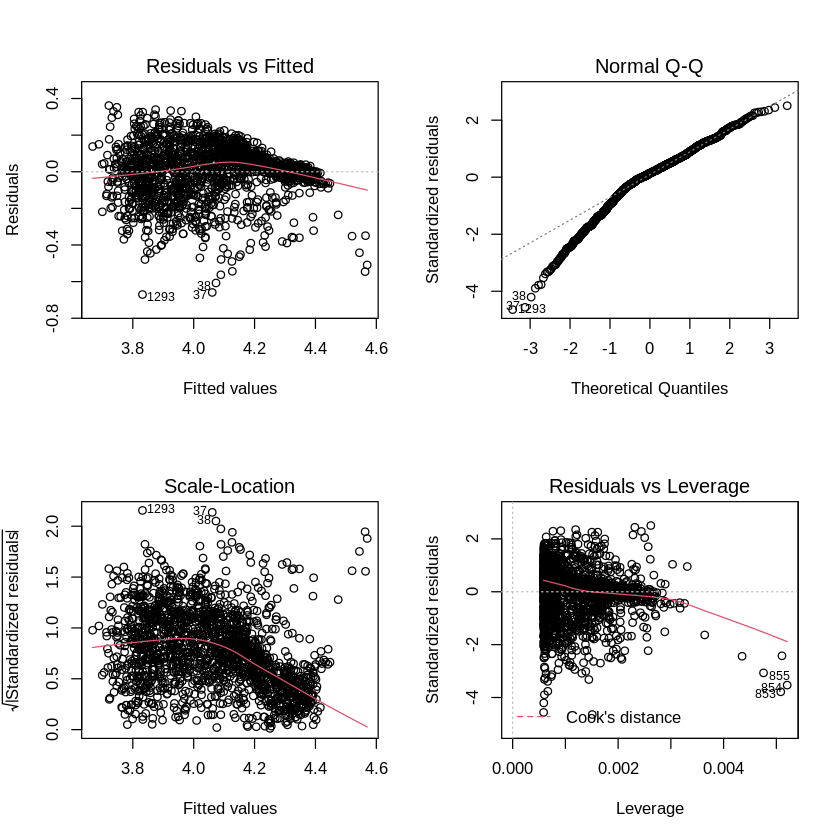

In [ ]:
par(mfrow=c(2,2))
plot(regressao)
shapiro.test(teste$residuals)

In [ ]:
gvlma(regressao)


Call:
lm(formula = lexpVida ~ lpibPercap, data = df)

Coefficients:
(Intercept)   lpibPercap  
     2.8642       0.1465  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = regressao) 

                     Value   p-value                   Decision
Global Stat        360.960 0.000e+00 Assumptions NOT satisfied!
Skewness           197.023 0.000e+00 Assumptions NOT satisfied!
Kurtosis           121.275 0.000e+00 Assumptions NOT satisfied!
Link Function       38.911 4.437e-10 Assumptions NOT satisfied!
Heteroscedasticity   3.752 5.274e-02    Assumptions acceptable.

Aparentemente as variáveis do modelo são ajustada para o log de 10 para resolver possíveis problemas de normalidade dos resíduos, no entanto não consegui identificar isso nos testes acima.

## k)    Faça todas as análises da regressão, julgando:

i)        Os gráficos diagnósticos

ii)        Os parâmetros obtidos (avaliar o summary do modelo)

iii)        O poder de explicação do modelo

### Gráfico

`geom_smooth()` using formula 'y ~ x'



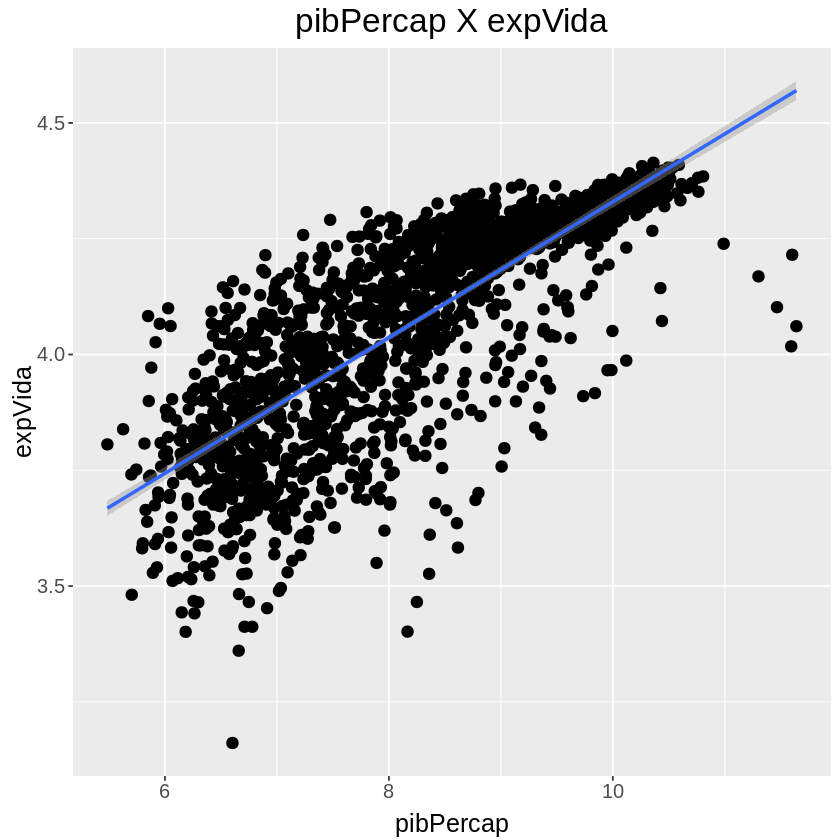

In [ ]:
ggplot(data = df, aes(x = lpibPercap, y = lexpVida)) + 
    geom_point(size = 1.5, stroke = 1.5) + 
    geom_smooth(method = lm) +
    xlab("pibPercap") + 
    ylab("expVida") + 
    ggtitle('pibPercap X expVida') +
    theme(
        plot.title=element_text(size = 20, hjust = 0.5),
        axis.title.y=element_text(size = 15, vjust = +0.2),
        axis.title.x=element_text(size = 15, vjust = -0.2),
        axis.text.y=element_text(size = 12),
        axis.text.x=element_text(size = 12),
    )

### Resíduos

In [ ]:
resumo$r.squared

[1] 0.6132023

O r quadrado e 0,61 indica que o modelo responde 61% da variância dos dados em relação à media. 

In [ ]:
anova <- anova(regressao)
anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
lpibPercap,1,56.34280,56.34280459,2698.233,0
Residuals,1702,35.54009,0.02088137,NA,NA


In [ ]:
eqm <- anova[2,3] 
eqm

[1] 0.02088137

O erro quadratico médio baixo, por sua vez, indica que o modelo está bem ajustado aos dados

### Condições de validade do modelo

#### Heterocedasticidade

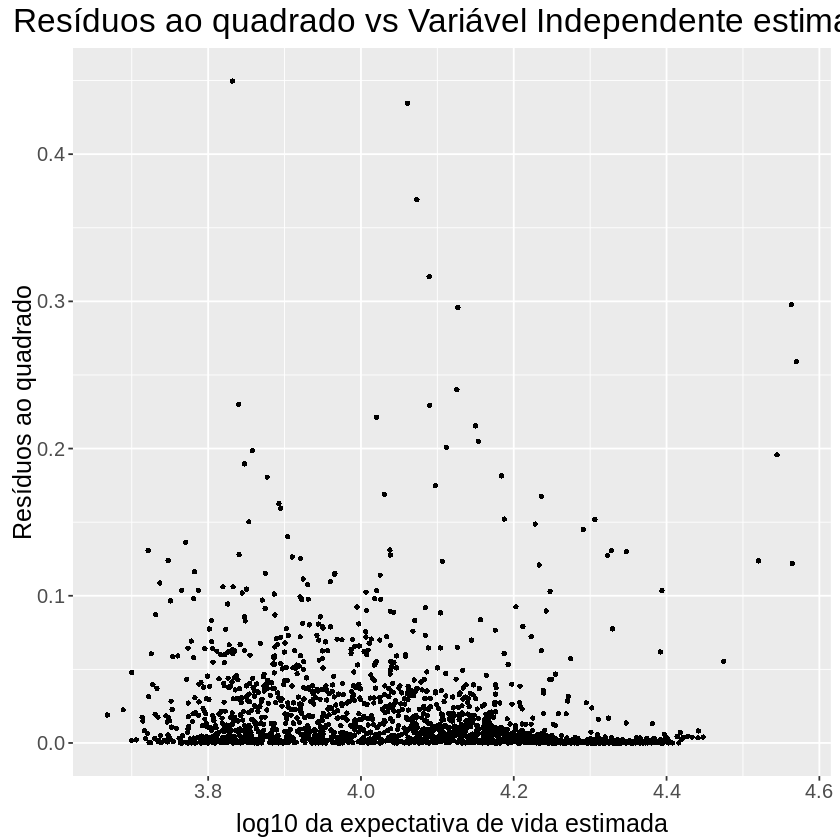

In [ ]:
ggplot(data = df, aes(x = exp_estimada , y = residuos ** 2)) + 
    geom_point(size = 1.5, stroke = 0) + 
    xlab("log10 da expectativa de vida estimada") + 
    ylab("Resíduos ao quadrado") + 
    ggtitle('Resíduos ao quadrado vs Variável Independente estimada') +
    theme(
        plot.title=element_text(size = 20, hjust = 0.5),
        axis.title.y=element_text(size = 15, vjust = +0.2),
        axis.title.x=element_text(size = 15, vjust = -0.2),
        axis.text.y=element_text(size = 12),
        axis.text.x=element_text(size = 12),
    )

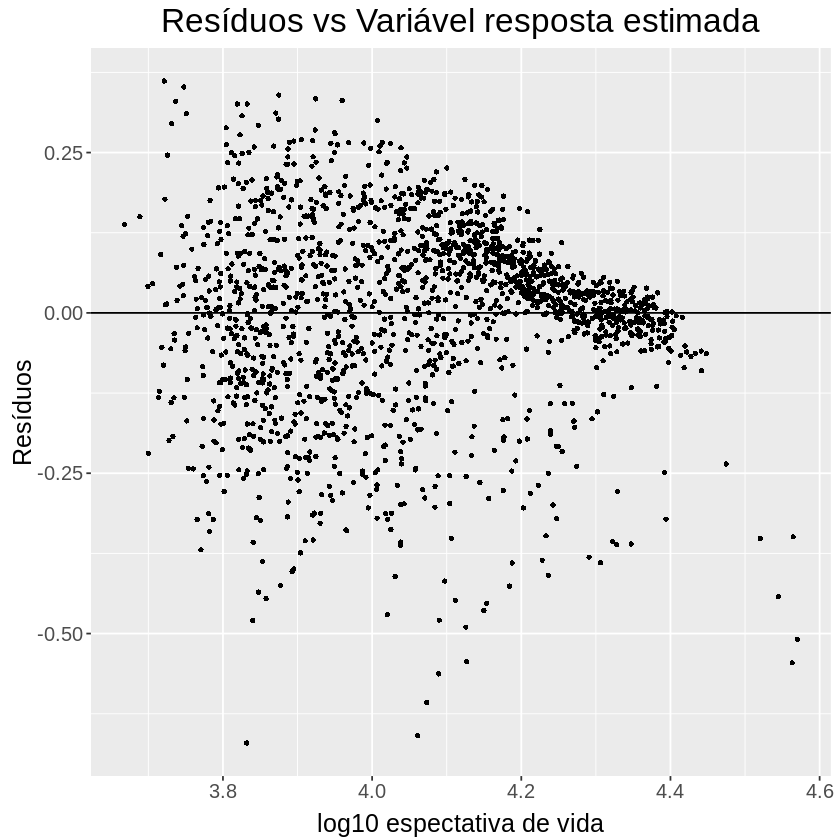

In [ ]:
ggplot(data = df, aes(x = exp_estimada, y = residuos)) + 
    geom_hline(yintercept = 0, color = 'black') +
    geom_point(size = 1.5, stroke = 0) + 
    xlab("log10 espectativa de vida") + 
    ylab("Resíduos") + 
    ggtitle('Resíduos vs Variável resposta estimada') +
    theme(
        plot.title=element_text(size = 20, hjust = 0.5),
        axis.title.y=element_text(size = 15, vjust = +0.2),
        axis.title.x=element_text(size = 15, vjust = -0.2),
        axis.text.y=element_text(size = 12),
        axis.text.x=element_text(size = 12),
    )

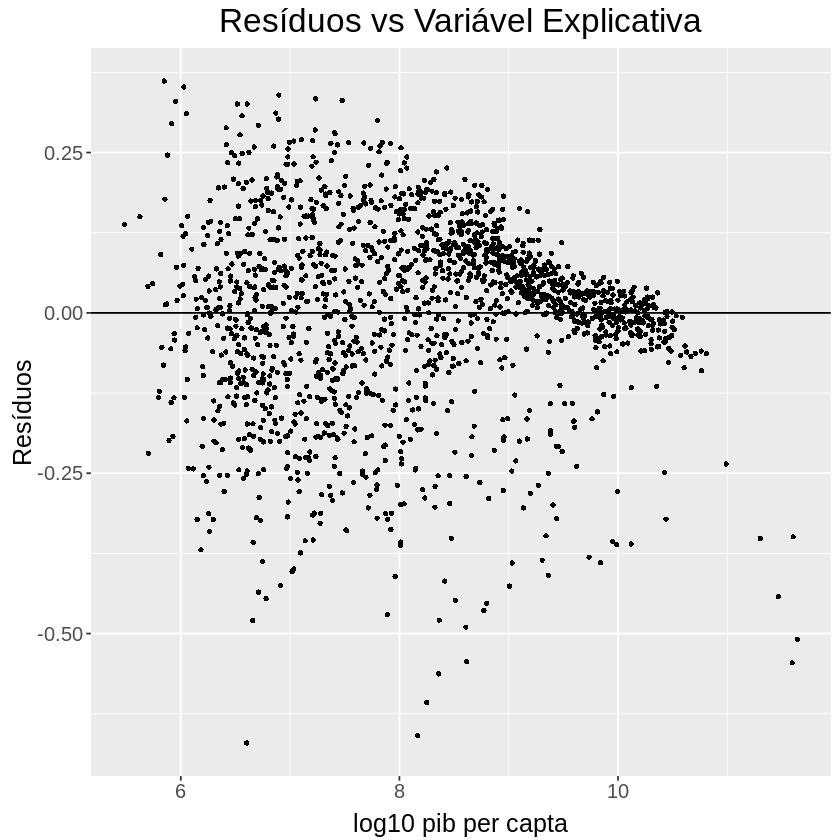

In [ ]:
ggplot(data = df, aes(x = lpibPercap, y = residuos)) + 
    geom_hline(yintercept = 0, color = 'black') +
    geom_point(size = 1.5, stroke = 0) + 
    xlab("log10 pib per capta") + 
    ylab("Resíduos") + 
    ggtitle('Resíduos vs Variável Explicativa') +
    theme(
        plot.title=element_text(size = 20, hjust = 0.5),
        axis.title.y=element_text(size = 15, vjust = +0.2),
        axis.title.x=element_text(size = 15, vjust = -0.2),
        axis.text.y=element_text(size = 12),
        axis.text.x=element_text(size = 12),
    )

#### Linearidade

`geom_smooth()` using formula 'y ~ x'



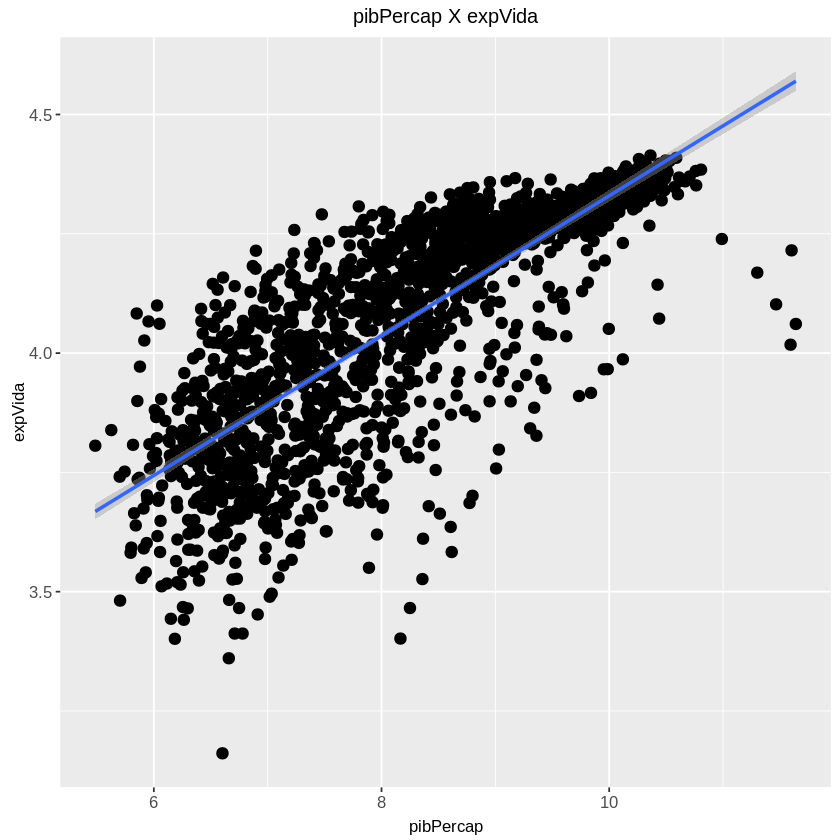

In [ ]:
ggplot(data = df, aes(x = lpibPercap, y = lexpVida)) + 
    geom_point(size = 1.5, stroke = 1.5) + 
    geom_smooth(method = lm) +
    xlab("pibPercap") + 
    ylab("expVida") + 
    ggtitle('pibPercap X expVida') +
    theme(
        plot.title=element_text(size = 12, hjust = 0.5),
        axis.title.y=element_text(size = 10, vjust = +0.2),
        axis.title.x=element_text(size = 10, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10),
    )

In [ ]:
cor(df[7:8])

,lpibPercap,lexpVida
lpibPercap,1.0000000,0.7830724
lexpVida,0.7830724,1.0000000


A alta correlação (0,78) indica a linearidade entre as variáveis do modelo

#### Teste de normalidade nas variáveis do modelo

In [ ]:
# Normalidade da variável explicativa
shapiro.test(df$lpibPercap)


	Shapiro-Wilk normality test

data:  df$lpibPercap
W = 0.9753, p-value < 2.2e-16


In [ ]:
# Normalidade da variável resposta
shapiro.test(df$lexpVida)


	Shapiro-Wilk normality test

data:  df$lexpVida
W = 0.93724, p-value < 2.2e-16


O teste de normalidade aplicado às duas variáveis indica que elas seguem a distribuiçao normal, assim como os resíduos pois o teste p foi inferior a 0.05.

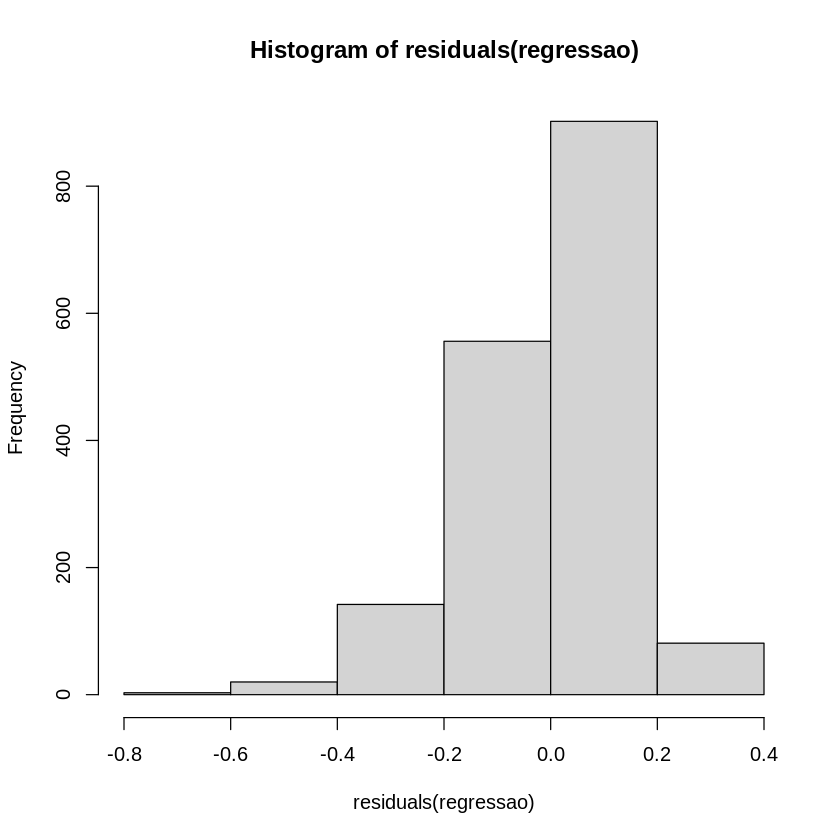

In [ ]:
hist(residuals(regressao),breaks=5)

In [ ]:
# Normalidade dos resíduos
shapiro.test(regressao$residual)


	Shapiro-Wilk normality test

data:  regressao$residual
W = 0.96055, p-value < 2.2e-16


O teste de normalidade indica que os resíduos não seguem uma distribuição normal

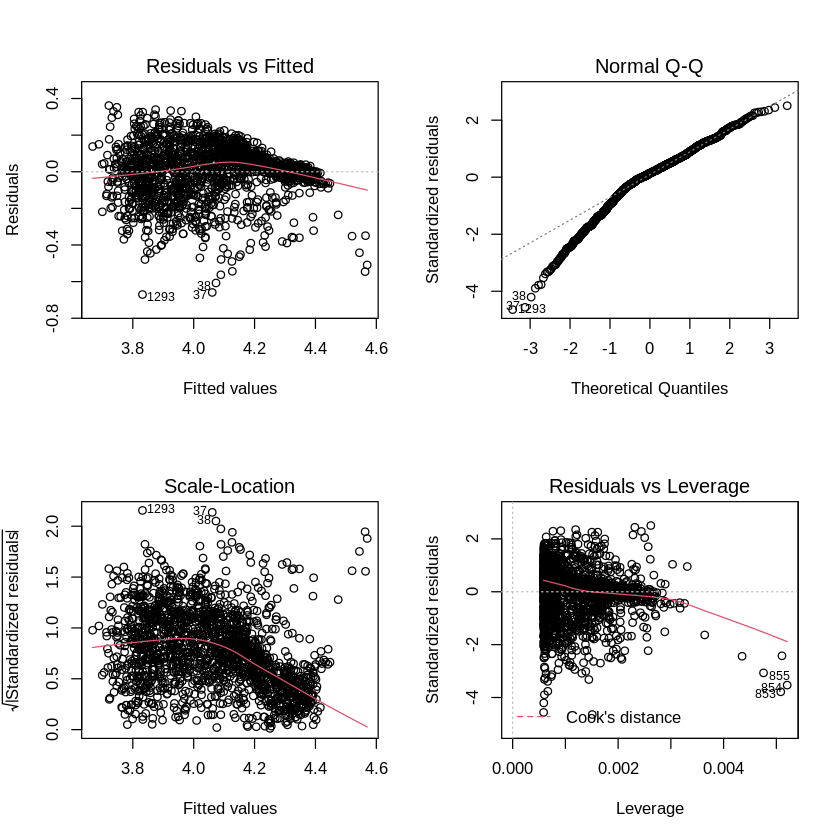

In [ ]:
par(mfrow=c(2,2))
plot(regressao)

In [ ]:
summary(gvlma(regressao))


Call:
lm(formula = lexpVida ~ lpibPercap, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67059 -0.06453  0.01978  0.09086  0.36156 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.864177   0.023283  123.02   <2e-16 ***
lpibPercap  0.146549   0.002821   51.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1445 on 1702 degrees of freedom
Multiple R-squared:  0.6132,	Adjusted R-squared:  0.613 
F-statistic:  2698 on 1 and 1702 DF,  p-value: < 2.2e-16


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = regressao) 

                     Value   p-value                   Decision
Global Stat        360.960 0.000e+00 Assumptions NOT satisfied!
Skewness           197.023 0.000e+00 Assumptions NOT satisfied!
Kurtosis           121.275 0.000e+00 Assumptions NOT satisfied!
Link Function    

# Problema 3
Neste exercício vamos fazer uma análise de regressão com a base de dados autos.csv para tentar prever o preço de carro a partir de sua potência. Na nossa base de dados, estas variáveis são horsepower e price.

### Data prep

In [ ]:
autos <- read.csv("/content/autos.csv", sep= ';')
head(autos)

,make,fuel.type,aspiration,num.doors,body.style,drive.wheels,engine.location,wheel.base,length,width,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,alfa-romero,gas,std,2,convertible,rwd,front,"88,6","168,8","64,1",⋯,130,mpfi,"3,47","2,68",9,111,5000,21,27,13495
2,alfa-romero,gas,std,2,convertible,rwd,front,"88,6","168,8","64,1",⋯,130,mpfi,"3,47","2,68",9,111,5000,21,27,16500
3,alfa-romero,gas,std,2,hatchback,rwd,front,"94,5","171,2","65,5",⋯,152,mpfi,"2,68","3,47",9,154,5000,19,26,16500
4,audi,gas,std,4,sedan,fwd,front,"99,8","176,6","66,2",⋯,109,mpfi,"3,19","3,4",10,102,5500,24,30,13950
5,audi,gas,std,4,sedan,4wd,front,"99,4","176,6","66,4",⋯,136,mpfi,"3,19","3,4",8,115,5500,18,22,17450
6,audi,gas,std,2,sedan,fwd,front,"99,8","177,3","66,3",⋯,136,mpfi,"3,19","3,4","8,5",110,5500,19,25,15250


In [ ]:
head(autos$engine.type)

[1] "dohc" "dohc" "ohcv" "ohc"  "ohc"  "ohc"

In [ ]:
autos$wheel.base = as.numeric(sub(",", ".", autos$wheel.base))
autos$length = as.numeric(sub(",", ".", autos$length))
autos$width = as.numeric(sub(",", ".", autos$width))
autos$height = as.numeric(sub(",", ".", autos$height))
autos$curb.weight = as.numeric(sub(",", ".", autos$curb.weight))
autos$num.cylinders = as.numeric(sub(",", ".", autos$num.cylinders))
autos$engine.size = as.numeric(sub(",", ".", autos$engine.size))
autos$bore = as.numeric(sub(",", ".", autos$bore))
autos$stroke = as.numeric(sub(",", ".", autos$stroke))

In [ ]:
str(autos)

'data.frame':	193 obs. of  24 variables:
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.doors        : int  2 2 2 4 4 2 4 4 4 2 ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 ...
 $ curb.weight      : num  2548 2548 2823 2337 2824 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.cylinders    : num  4 4 6 4 5 5 5 5 5 4 ...
 $ engine.size      : num  130 130 152 109 136 136 136 136 131 108 ...
 $ fuel.system  

In [ ]:
table(autos$body.style)


convertible     hardtop   hatchback       sedan       wagon 
          6           8          63          92          24 

In [ ]:
table(autos$fuel.type)


diesel    gas 
    19    174 

In [ ]:
table(autos$engine.location)


front  rear 
  190     3 

In [ ]:
summary(autos)

     make            fuel.type          aspiration          num.doors    
 Length:193         Length:193         Length:193         Min.   :2.000  
 Class :character   Class :character   Class :character   1st Qu.:2.000  
 Mode  :character   Mode  :character   Mode  :character   Median :4.000  
                                                          Mean   :3.161  
                                                          3rd Qu.:4.000  
                                                          Max.   :4.000  
  body.style        drive.wheels       engine.location      wheel.base    
 Length:193         Length:193         Length:193         Min.   : 86.60  
 Class :character   Class :character   Class :character   1st Qu.: 94.50  
 Mode  :character   Mode  :character   Mode  :character   Median : 97.00  
                                                          Mean   : 98.92  
                                                          3rd Qu.:102.40  
                                

In [ ]:
head(autos)

,make,fuel.type,aspiration,num.doors,body.style,drive.wheels,engine.location,wheel.base,length,width,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>
1,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,⋯,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
2,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,⋯,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
3,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,⋯,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
4,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,⋯,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
5,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,⋯,136,mpfi,3.19,3.40,8,115,5500,18,22,17450
6,audi,gas,std,2,sedan,fwd,front,99.8,177.3,66.3,⋯,136,mpfi,3.19,3.40,"8,5",110,5500,19,25,15250


In [ ]:
tail(autos)

,make,fuel.type,aspiration,num.doors,body.style,drive.wheels,engine.location,wheel.base,length,width,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>
188,volvo,gas,turbo,4,wagon,rwd,front,104.3,188.8,67.2,⋯,130,mpfi,3.62,3.15,"7,5",162,5100,17,22,18950
189,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,⋯,141,mpfi,3.78,3.15,"9,5",114,5400,23,28,16845
190,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,⋯,141,mpfi,3.78,3.15,"8,7",160,5300,19,25,19045
191,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,⋯,173,mpfi,3.58,2.87,"8,8",134,5500,18,23,21485
192,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,⋯,145,idi,3.01,3.40,23,106,4800,26,27,22470
193,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.9,⋯,141,mpfi,3.78,3.15,"9,5",114,5400,19,25,22625


### Explorando as variáveis

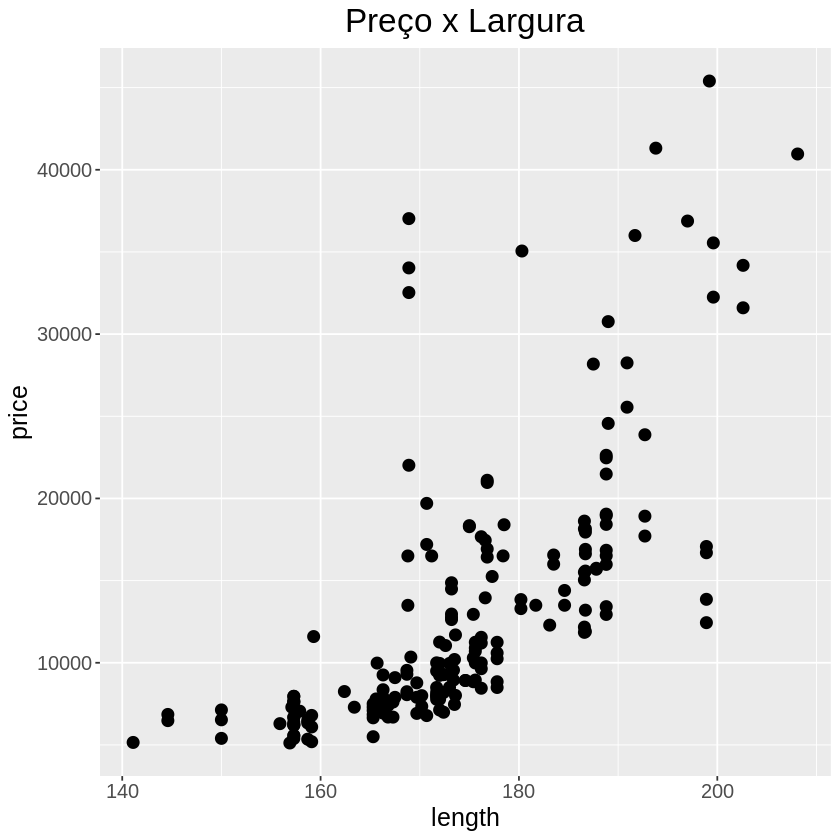

In [ ]:
ggplot(autos) + geom_point(aes(length, price), size = 3) + 
ggtitle('Preço x Largura') + theme(plot.title=element_text(size = 20, hjust = 0.5), 
axis.text.y=element_text(size = 12),
axis.text.x=element_text(size = 12),
axis.title.y=element_text(size = 15),
axis.title.x=element_text(size = 15))

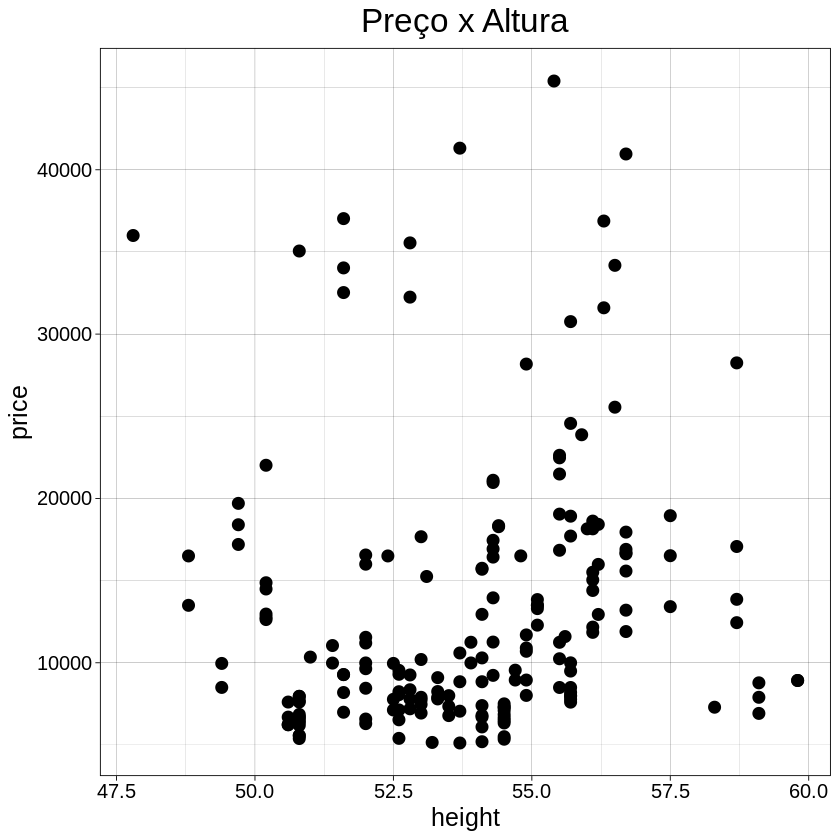

In [ ]:
ggplot(autos) + geom_point(aes(height, price), size = 3) + 
ggtitle('Preço x Altura') + theme_linedraw()+ theme(plot.title=element_text(size = 20, hjust = 0.5), 
axis.text.y=element_text(size = 12),
axis.text.x=element_text(size = 12),
axis.title.y=element_text(size = 15),
axis.title.x=element_text(size = 15)) 

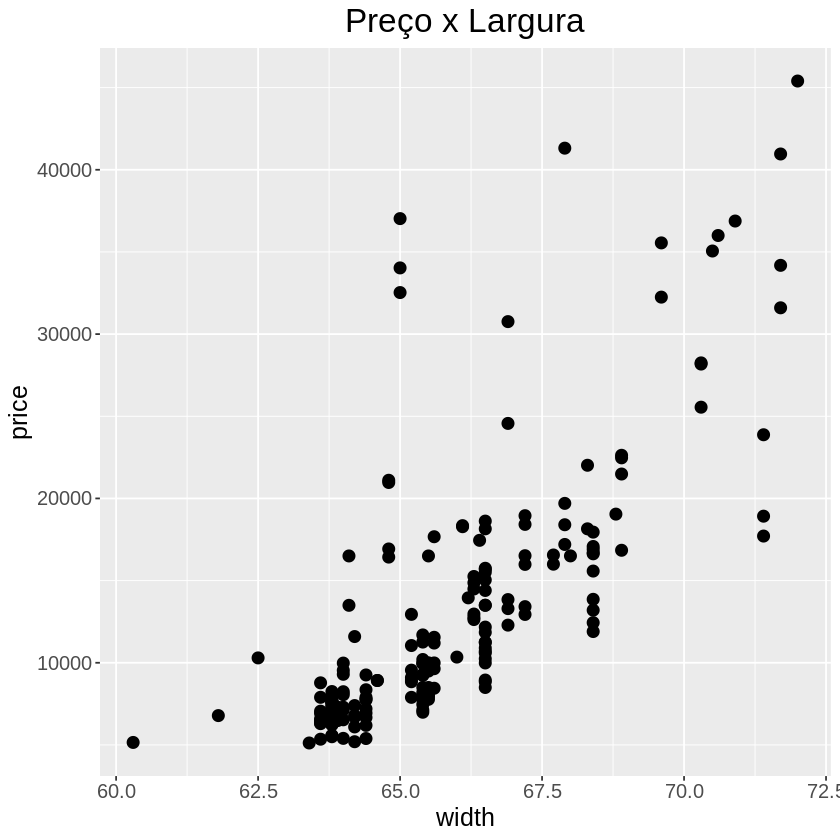

In [ ]:
ggplot(autos) + geom_point(aes(width, price), size = 3) + 
ggtitle('Preço x Largura') + theme(plot.title=element_text(size = 20, hjust = 0.5), 
axis.text.y=element_text(size = 12),
axis.text.x=element_text(size = 12),
axis.title.y=element_text(size = 15),
axis.title.x=element_text(size = 15))

Warning message:
“Ignoring unknown aesthetics: main”


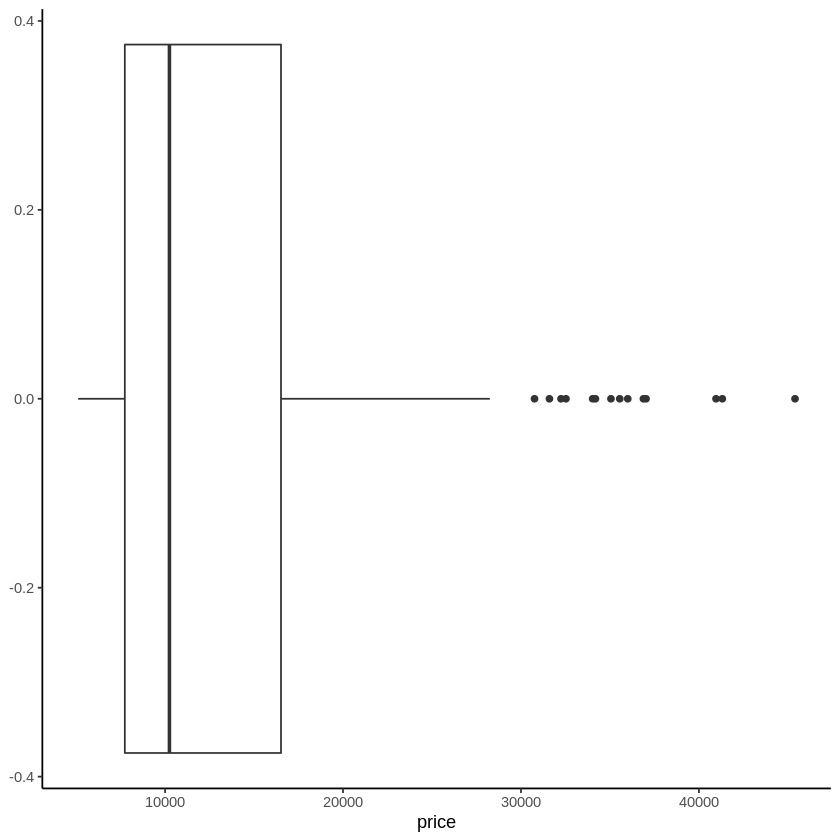

In [ ]:
ggplot(autos) + geom_boxplot(aes(price, main= 'price')) + theme_classic()

### Horsepower vs price


In [ ]:
cor(autos$horsepower, autos$price)

[1] 0.8124532

In [ ]:
linear <- lm(formula = autos$price ~ autos$horsepower, data = autos)
linear


Call:
lm(formula = autos$price ~ autos$horsepower, data = autos)

Coefficients:
     (Intercept)  autos$horsepower  
         -4630.7             173.1  


In [ ]:
resumo <- summary(linear)
resumo


Call:
lm(formula = autos$price ~ autos$horsepower, data = autos)

Residuals:
     Min       1Q   Median       3Q      Max 
-10296.1  -2243.5   -450.1   1794.7  18174.9 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -4630.70     990.58  -4.675 5.55e-06 ***
autos$horsepower   173.13       8.99  19.259  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4728 on 191 degrees of freedom
Multiple R-squared:  0.6601,	Adjusted R-squared:  0.6583 
F-statistic: 370.9 on 1 and 191 DF,  p-value: < 2.2e-16


In [ ]:
anova <- anova(linear)
anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
autos$horsepower,1,8292710641,8292710641,370.8973,1.248407e-46
Residuals,191,4270475650,22358511,NA,NA


In [ ]:
resumo$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-4630.7022,990.577624,-4.674749,5.550226e-06
autos$horsepower,173.1292,8.989663,19.258693,1.248407e-46


In [ ]:
head(autos, 2)

,make,fuel.type,aspiration,num.doors,body.style,drive.wheels,engine.location,wheel.base,length,width,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>
1,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,⋯,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
2,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,⋯,130,mpfi,3.47,2.68,9,111,5000,21,27,16500


In [ ]:
-4630.7022 + 173.1292 * 111

[1] 14586.64

### Validando manualmente esse EQM

In [ ]:
valid <- select(autos, price, horsepower)
valid['estimado'] <- linear$fitted.values
valid['residuos'] <- linear$residuals
head(valid)

,price,horsepower,estimado,residuos
,<int>,<int>,<dbl>,<dbl>
1,13495,111,14586.63,-1091.6342
2,16500,111,14586.63,1913.3658
3,16500,154,22031.19,-5531.1880
4,13950,102,13028.47,921.5282
5,17450,115,15279.15,2170.8491
6,15250,110,14413.51,836.4949


In [ ]:
mean(valid$residuos)

[1] 4.406377e-14

In [ ]:
sum(valid$residuos)

[1] 8.39151e-12

In [ ]:
length(unique(valid$horsepower))

[1] 56

In [ ]:
length(unique(valid$estimado))

[1] 64

In [ ]:
length(unique(valid$price))

[1] 178

In [ ]:
unique(valid$horsepower)

[1] 111 154 102 115 110 140 101 121 182  48  70  68  88 145  58  76  60  86 100
[20]  78  90 176 262  84 120  72 123 155 184 175 116  69  55  97 152 160 200  95
[39] 142 143 207  73  82  94  62  56 112  92 161 156  52  85 114 162 134 106

In [ ]:
erro_quadrado <- sum(apply(valid, 1, function(x) x['residuos'] ** 2))
erro_quadrado

[1] 4270475650

In [ ]:
quadrados_totais <- sum(apply(valid, 1, function(x) (x['price'] - mean(valid$estimado)) ** 2 ))
quadrados_totais

[1] 12563186291

In [ ]:
quadrados_regressao <- sum(apply(valid, 1, function(x) (x['estimado'] - mean(valid$price)) **2))
quadrados_regressao

[1] 8292710641

In [ ]:
r_2 <- quadrados_regressao / quadrados_totais
r_2

[1] 0.6600802

In [ ]:
resumo$r.squared

[1] 0.6600802

In [ ]:
erro_quadratico_medio <- erro_quadrado / (nrow(valid) - 2)
erro_quadratico_medio

[1] 22358511

In [ ]:
anova(linear)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
autos$horsepower,1,8292710641,8292710641,370.8973,1.248407e-46
Residuals,191,4270475650,22358511,NA,NA


In [ ]:
dados <- select(autos,'horsepower', 'price')

In [ ]:
dados['estimado'] <- linear$fitted.values
dados['residuos'] <- linear$residuals

In [ ]:
head(dados)

,horsepower,price,estimado,residuos
,<int>,<int>,<dbl>,<dbl>
1,111,13495,14586.63,-1091.6342
2,111,16500,14586.63,1913.3658
3,154,16500,22031.19,-5531.1880
4,102,13950,13028.47,921.5282
5,115,17450,15279.15,2170.8491
6,110,15250,14413.51,836.4949


In [ ]:
resumo$r.squared

[1] 0.6600802

### Condições de validade do modelo

#### Heterocedasticidade

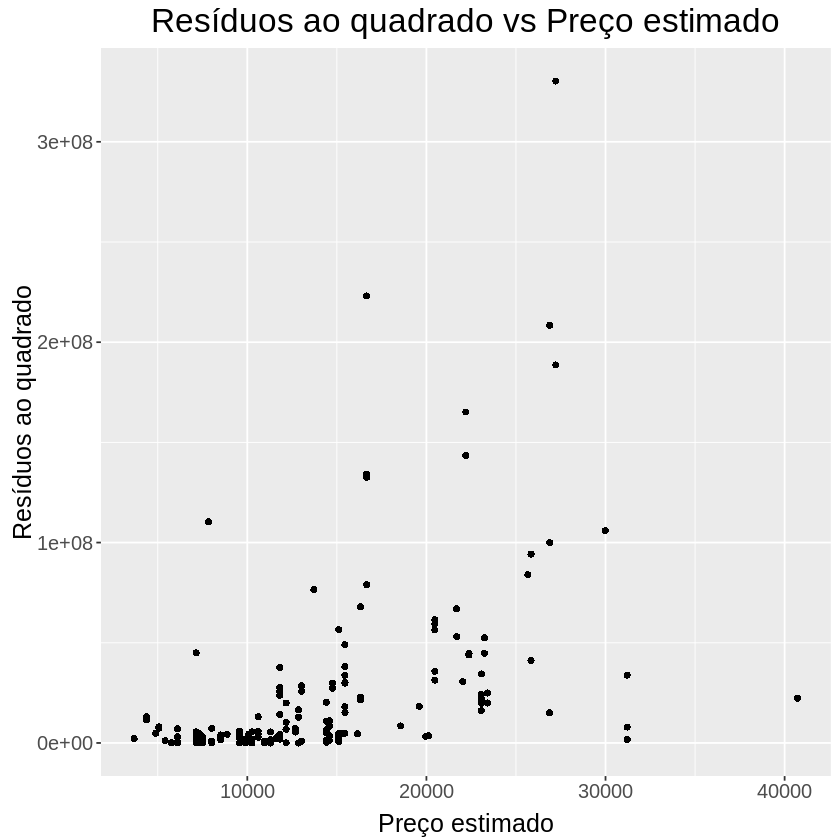

In [ ]:
# Resíduos ao quadrado vs Variável Independente estimada
ggplot(data = dados, aes(x = estimado , y = residuos ** 2)) + 
    geom_point(size = 2, stroke = 0) + 
    xlab("Preço estimado") + 
    ylab("Resíduos ao quadrado") + 
    ggtitle('Resíduos ao quadrado vs Preço estimado') +
    theme(
        plot.title=element_text(size = 20, hjust = 0.5),
        axis.title.y=element_text(size = 15, vjust = +0.2),
        axis.title.x=element_text(size = 15, vjust = -0.2),
        axis.text.y=element_text(size = 12),
        axis.text.x=element_text(size = 12),
    )

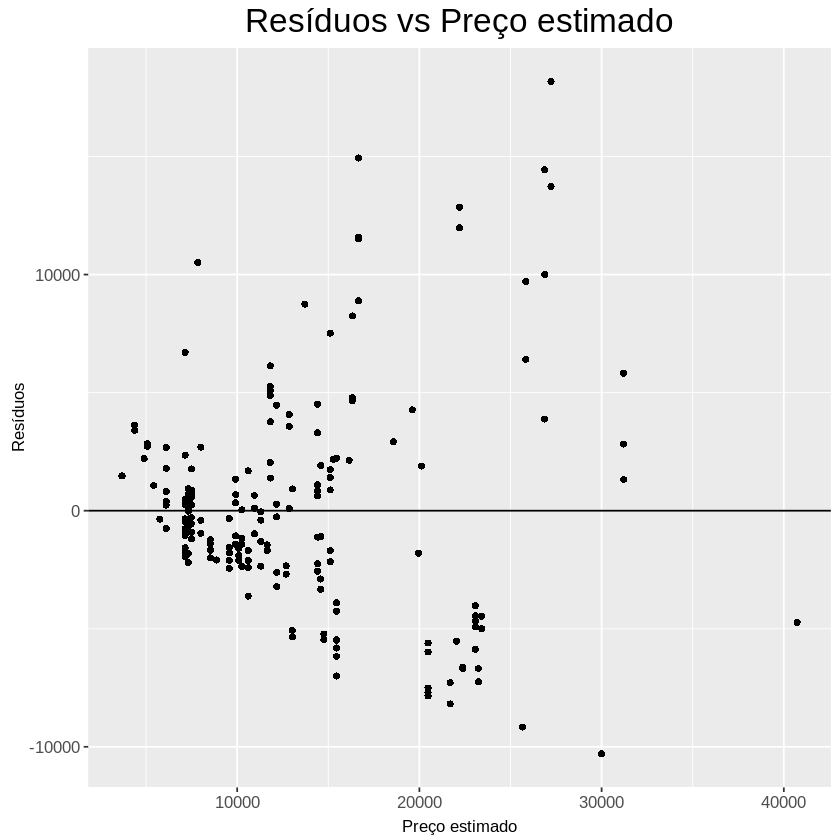

In [ ]:
# Resíduos vs Variável resposta estimada
ggplot(data = dados, aes(x = estimado, y = residuos)) + 
    geom_hline(yintercept = 0, color = 'black') +
    geom_point(size = 2, stroke = 0) + 
    xlab("Preço estimado") + 
    ylab("Resíduos") + 
    ggtitle('Resíduos vs Preço estimado') +
    theme(
        plot.title=element_text(size = 20, hjust = 0.5),
        axis.title.y=element_text(size = 10, vjust = +0.2),
        axis.title.x=element_text(size = 10, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10),
    )

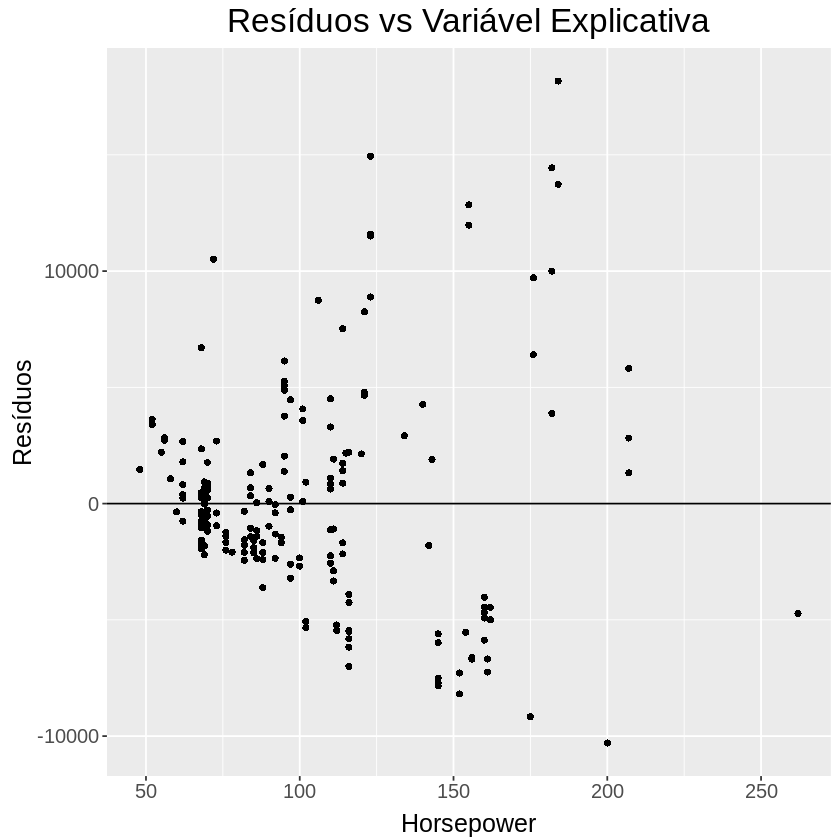

In [ ]:
# Resíduos vs Variável Explicativa
ggplot(data = dados, aes(x = horsepower, y = residuos)) + 
    geom_hline(yintercept = 0, color = 'black') +
    geom_point(size = 2, stroke = 0) + 
    xlab("Horsepower") + 
    ylab("Resíduos") + 
    ggtitle('Resíduos vs Variável Explicativa') +
    theme(
        plot.title=element_text(size = 20, hjust = 0.5),
        axis.title.y=element_text(size = 15, vjust = +0.2),
        axis.title.x=element_text(size = 15, vjust = -0.2),
        axis.text.y=element_text(size = 12),
        axis.text.x=element_text(size = 12),
    )

#### Linearidade

`geom_smooth()` using formula 'y ~ x'



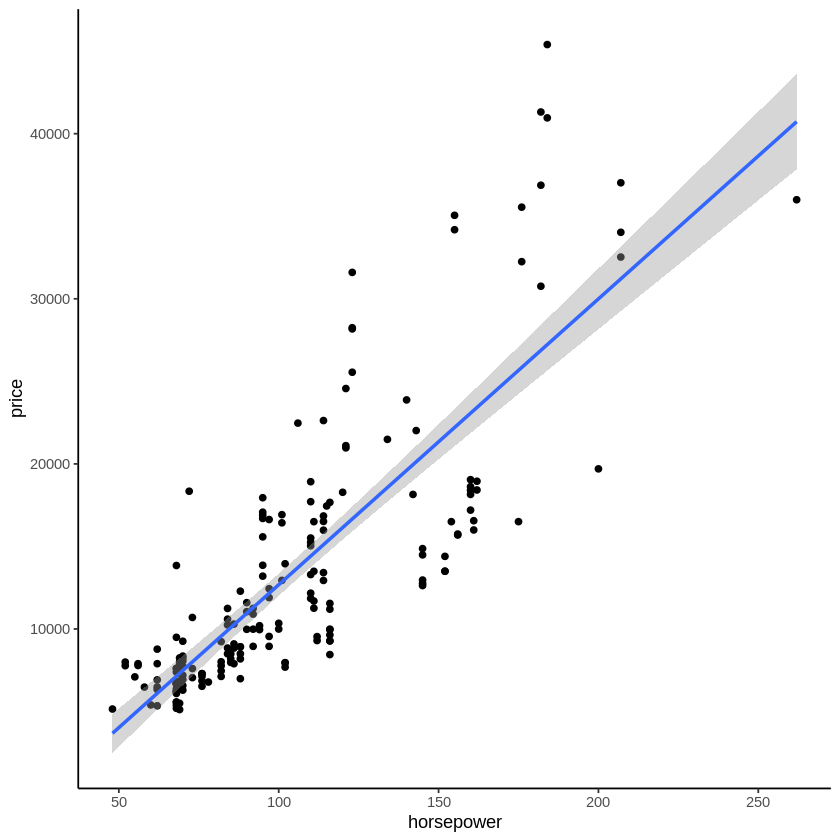

In [ ]:
ggplot(dados, aes(x= horsepower, y= price)) + geom_point() + geom_smooth(method = lm) + theme_classic()

In [ ]:
cor(dados$horsepower, dados$price)

[1] 0.8124532

#### Normalidade

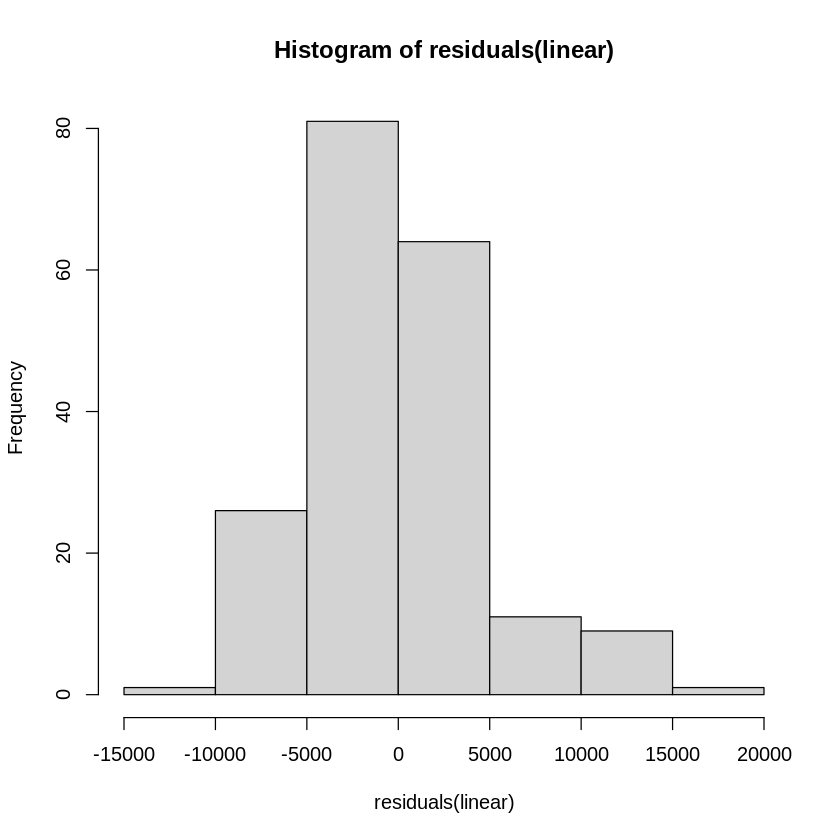

In [ ]:
hist(residuals(linear),breaks=5)

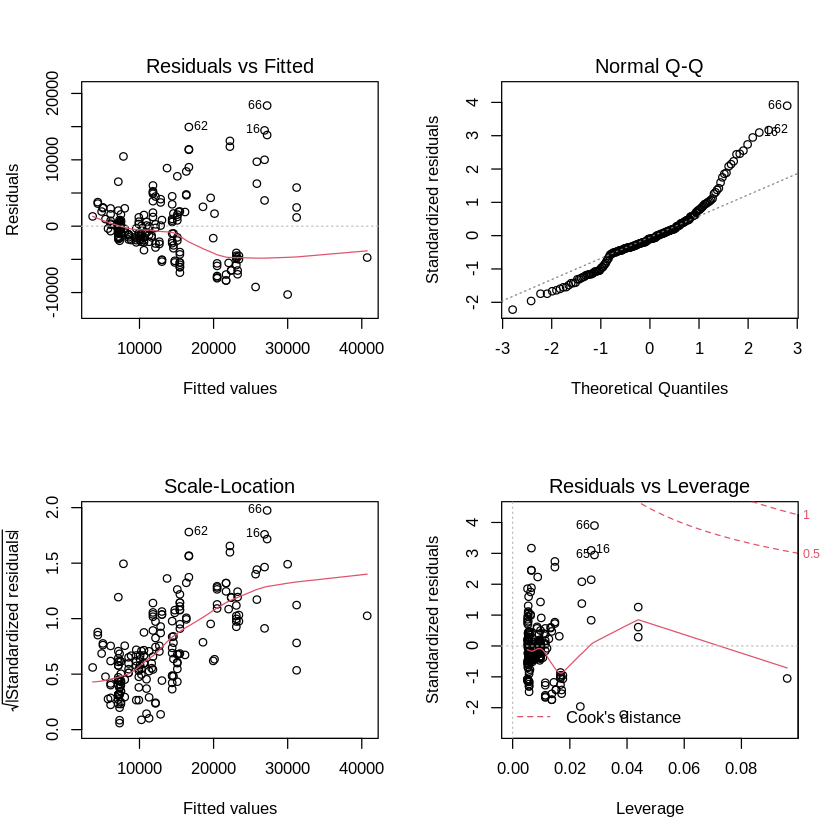

In [ ]:
par(mfrow=c(2,2))
plot(linear)

In [ ]:
normalidade <- shapiro.test(dados$residuo)
normalidade$p.value

[1] 1.630661e-07

In [ ]:
normalidade$p.value <= 0.05

[1] TRUE

#### Teste definitivo

In [ ]:
library(gvlma)

In [ ]:
summary(gvlma(linear))


Call:
lm(formula = autos$price ~ autos$horsepower, data = autos)

Residuals:
     Min       1Q   Median       3Q      Max 
-10296.1  -2243.5   -450.1   1794.7  18174.9 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -4630.70     990.58  -4.675 5.55e-06 ***
autos$horsepower   173.13       8.99  19.259  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4728 on 191 degrees of freedom
Multiple R-squared:  0.6601,	Adjusted R-squared:  0.6583 
F-statistic: 370.9 on 1 and 191 DF,  p-value: < 2.2e-16


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = linear) 

                     Value   p-value                   Decision
Global Stat        64.7104 2.961e-13 Assumptions NOT satisfied!
Skewness           30.8252 2.823e-08 Assumptions NOT satisfied!
Kurtosis           26.5687 2.543e-07 Assumptions NOT satisfi